# Problem Statement

In the fiercely competitive telecom industry, where customers can easily switch between service providers, a significant challenge emerges with an annual churn rate ranging from 15-25%. Retaining high-profit customers is crucial, given the substantial cost disparity between acquiring new customers and retaining existing ones (5-10 times more expensive). Incumbent operators prioritize retaining these valuable customers, making it a top business goal. To address this, there is a critical need to predict which customers are prone to churn. This project aims to analyze customer-level data from a leading telecom firm, utilizing predictive models to identify and understand the primary indicators of high-risk customers, thereby aiding in the strategic reduction of customer churn.

### Steps for the case study
> 1. Data understanding 
> 2. Data preparation
>> 2.1. Filter high-value customers \
>> 2.2. Tag churners and remove attributes of the churn phase \
>> 2.3. Feature derivation
>> 
> 3. Data Cleaning and EDA
>> 3.1 Exploratory Data Analysis \
>> 3.2 Data Visualization \
>> 3.3 Data Cleaning
>> 
> 4. Model Building and evaluation
>> 4.1. Test-Train Split \
>> 4.2. Scaling \
>> 4.3 Building the model 
>>> 4.3.1 Principal Component Analysis \
>>> 4.3.2 Respampling techniques
>>>
>>
> 5. Model Evaluation
>> 5.1 Gradient Boosting \
>> 5.2 Hyper-parameter Tuning \
>> 5.3 Plotting ROC curve
>> 5.4 Finding Optimal Cutoff point
>>
> 6. Conclusion

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
from time import time
import pprint

import matplotlib.pyplot as plt
import seaborn as sns

# so we dont get data omitted
pd.set_option("display.max_columns",500)
pd.set_option('display.max_rows', 500)

In [ ]:
data = pd.read_csv("telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## Step 1: Data Understanding

In [ ]:
((data.isna().sum()/data.shape[0])*100).sort_values(ascending=False)

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

In [ ]:
data.shape

(99999, 226)

In [ ]:
data.describe(include="all")

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [ ]:
# columns = []
for col in data.columns:
    if 'amt' in col:
        print(col)

# print(columns)

total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
total_rech_amt_9
max_rech_amt_6
max_rech_amt_7
max_rech_amt_8
max_rech_amt_9
last_day_rch_amt_6
last_day_rch_amt_7
last_day_rch_amt_8
last_day_rch_amt_9
av_rech_amt_data_6
av_rech_amt_data_7
av_rech_amt_data_8
av_rech_amt_data_9


In [ ]:
data[['arpu_6', 'total_rech_amt_6', 'jun_vbc_3g', 'av_rech_amt_data_6', 'aon']].describe()

,arpu_6,total_rech_amt_6,jun_vbc_3g,av_rech_amt_data_6,aon
count,99999.000000,99999.000000,99999.000000,25153.000000,99999.000000
mean,282.987358,327.514615,60.021204,192.600982,1219.854749
std,328.439770,398.019701,253.938223,192.646318,954.733842
min,-2258.709000,0.000000,0.000000,1.000000,180.000000
25%,93.411500,109.000000,0.000000,82.000000,467.000000
50%,197.704000,230.000000,0.000000,154.000000,863.000000
75%,371.060000,437.500000,0.000000,252.000000,1807.500000
max,27731.088000,35190.000000,11166.210000,7546.000000,4337.000000


#### Observations:
- There are total 99999 records with 226 feature.
- There are many columns with null values.

## Step 2: Data Preparation

### 2.1 Filter high-value customers

**Filtering the records of high value customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).**

In [ ]:
data['total_arpu_6_7'] = data['arpu_6'] + data['arpu_7']
df = data[data['total_arpu_6_7']>=data['total_arpu_6_7'].quantile(0.7)]
df.shape

(30000, 227)

#### Observations:

- We have 30k records with high-Value Customers.

### 2.2 Tag churners and remove attributes of the churn phase

Tag customers as churned (1) if, in the fourth month, they had zero calls and no mobile internet usage; otherwise, tag as non-churned (0). Use specific attributes for tagging.

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [ ]:
df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].isna().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [ ]:
df['churn'] = df.apply(lambda x: 1 if x['total_ic_mou_9'] + x['total_og_mou_9'] + x['vol_2g_mb_9'] + x['vol_3g_mb_9']==0 else 0 , axis=1)
df['churn'].value_counts()

churn
0    27348
1     2652
Name: count, dtype: int64

Dropping all the attributes corresponding to the churn phase (all attributes having ‘ _9’ in their names).
Delete values corresponding to 9th month

In [ ]:
columns = []
for col in df.columns:
    if '_9' in col:
        columns.append(col)

print(columns)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [ ]:
df = df.drop(columns, axis=1)

In [ ]:
vbc_column = df.columns[df.columns.str.contains('sep',regex=True)]
df.drop(columns=vbc_column, inplace=True)

### 2.3 Feature derivation

In [ ]:
df[df.churn==1][['date_of_last_rech_data_6', 'total_rech_num_6', 'date_of_last_rech_data_7', 'total_rech_num_7', 'date_of_last_rech_data_8', 'total_rech_num_8']]

,date_of_last_rech_data_6,total_rech_num_6,date_of_last_rech_data_7,total_rech_num_7,date_of_last_rech_data_8,total_rech_num_8
7,NaN,5,NaN,5,NaN,7
97,NaN,14,NaN,17,NaN,14
111,6/13/2014,12,NaN,8,NaN,5
143,NaN,31,NaN,6,NaN,4
188,6/28/2014,6,NaN,1,NaN,0
...,...,...,...,...,...,...
99868,6/29/2014,24,7/25/2014,19,8/26/2014,19
99885,NaN,11,NaN,12,NaN,14
99887,NaN,22,NaN,13,NaN,5
99961,6/20/2014,3,NaN,12,NaN,2


In [ ]:
# change the date to just the day
df['date_of_last_rech_data_6'] = pd.to_datetime(df['date_of_last_rech_data_6'], format='%m/%d/%Y').dt.day
df['date_of_last_rech_data_7'] = pd.to_datetime(df['date_of_last_rech_data_7'], format='%m/%d/%Y').dt.day
df['date_of_last_rech_data_8'] = pd.to_datetime(df['date_of_last_rech_data_8'], format='%m/%d/%Y').dt.day

df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'], format='%m/%d/%Y').dt.day
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'], format='%m/%d/%Y').dt.day
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'], format='%m/%d/%Y').dt.day


# set NA to 0
df['date_of_last_rech_data_6'] = df['date_of_last_rech_data_6'].fillna(0)
df['date_of_last_rech_data_7'] = df['date_of_last_rech_data_7'].fillna(0)
df['date_of_last_rech_data_8'] = df['date_of_last_rech_data_8'].fillna(0)

df['date_of_last_rech_6'] = df['date_of_last_rech_6'].fillna(0)
df['date_of_last_rech_7'] = df['date_of_last_rech_7'].fillna(0)
df['date_of_last_rech_8'] = df['date_of_last_rech_8'].fillna(0)

In [ ]:
df[df.churn==1][['date_of_last_rech_data_6', 'total_rech_num_6', 'date_of_last_rech_data_7', 'total_rech_num_7', 'date_of_last_rech_data_8', 'total_rech_num_8']]

,date_of_last_rech_data_6,total_rech_num_6,date_of_last_rech_data_7,total_rech_num_7,date_of_last_rech_data_8,total_rech_num_8
7,0.0,5,0.0,5,0.0,7
97,0.0,14,0.0,17,0.0,14
111,13.0,12,0.0,8,0.0,5
143,0.0,31,0.0,6,0.0,4
188,28.0,6,0.0,1,0.0,0
...,...,...,...,...,...,...
99868,29.0,24,25.0,19,26.0,19
99885,0.0,11,0.0,12,0.0,14
99887,0.0,22,0.0,13,0.0,5
99961,20.0,3,0.0,12,0.0,2


In [ ]:
# Renaming month named vbc columns to 6,7,8,9 format 
df.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'}, inplace=True)

In [ ]:
df['churn'].value_counts(normalize=True)

churn
0    0.9116
1    0.0884
Name: proportion, dtype: float64

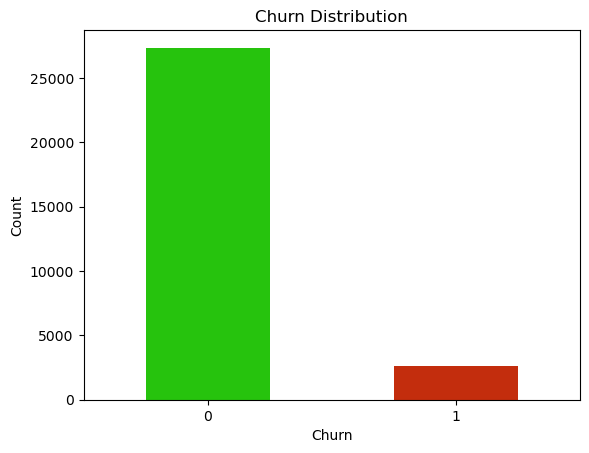

In [ ]:
# visualizing the churn distribution 

df['churn'].value_counts().plot(kind='bar', rot=0, title='Churn Distribution', color=['#26C30D', '#C32D0D']).set(xlabel='Churn', ylabel='Count');

**Observations:**

Churn Distribution is unbalanced and baised towards non churners, we need to balance the data before training our model. 

## Step 3: Data Clearning and EDA

### 3.1 Exploratory Data Analysis

<Axes: >

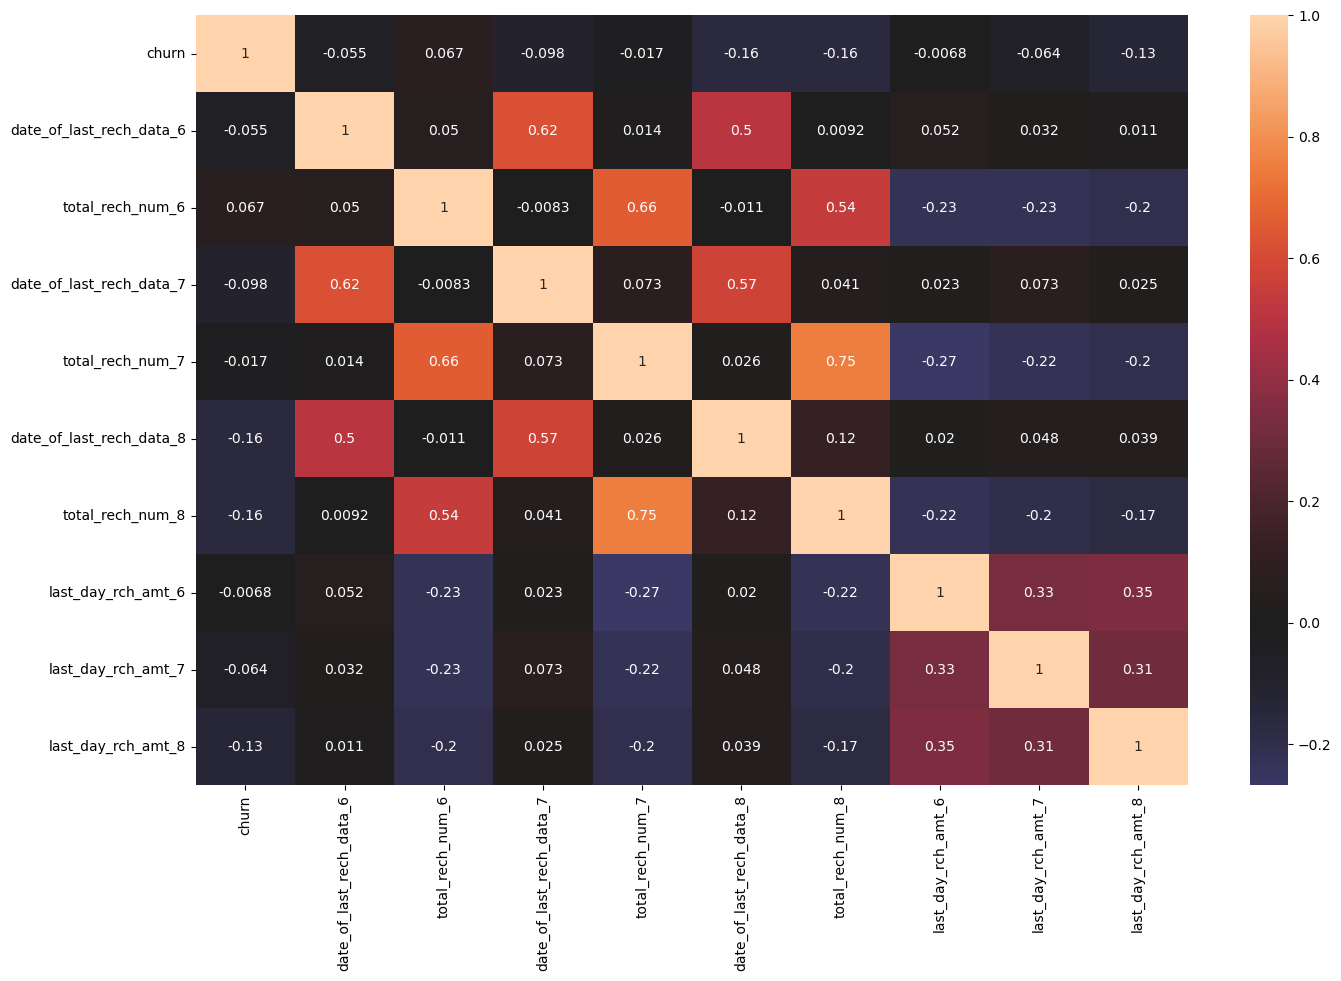

In [ ]:
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(df[['churn','date_of_last_rech_data_6', 'total_rech_num_6', 'date_of_last_rech_data_7', 'total_rech_num_7', 'date_of_last_rech_data_8', 'total_rech_num_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']].corr(), center=0, annot=True)

<Axes: >

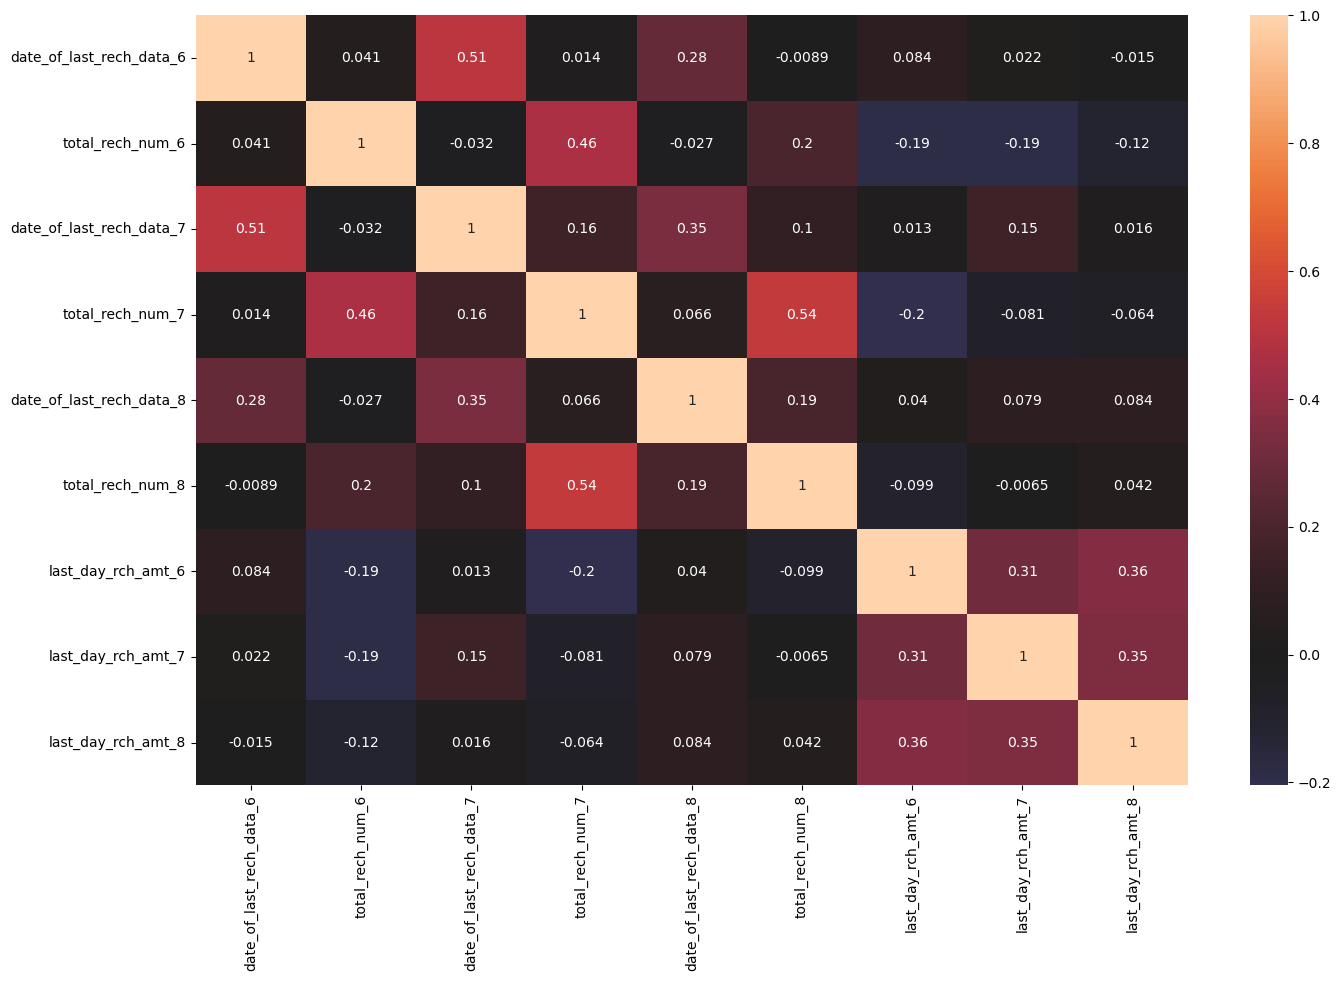

In [ ]:
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(df[df.churn==1][['date_of_last_rech_data_6', 'total_rech_num_6', 'date_of_last_rech_data_7', 'total_rech_num_7', 'date_of_last_rech_data_8', 'total_rech_num_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']].corr(), center=0, annot=True)

In [ ]:
# let analyse the feature aon- "Age on network - no of days the customer is using the operator T network"

df.aon.head()

# aon is given in days lets convert it to approx to months

df['duration_in_months'] = df.aon /30
df['duration_in_months'].head()

7     26.733333
8     10.500000
13    86.900000
16    17.033333
17    22.233333
Name: duration_in_months, dtype: float64

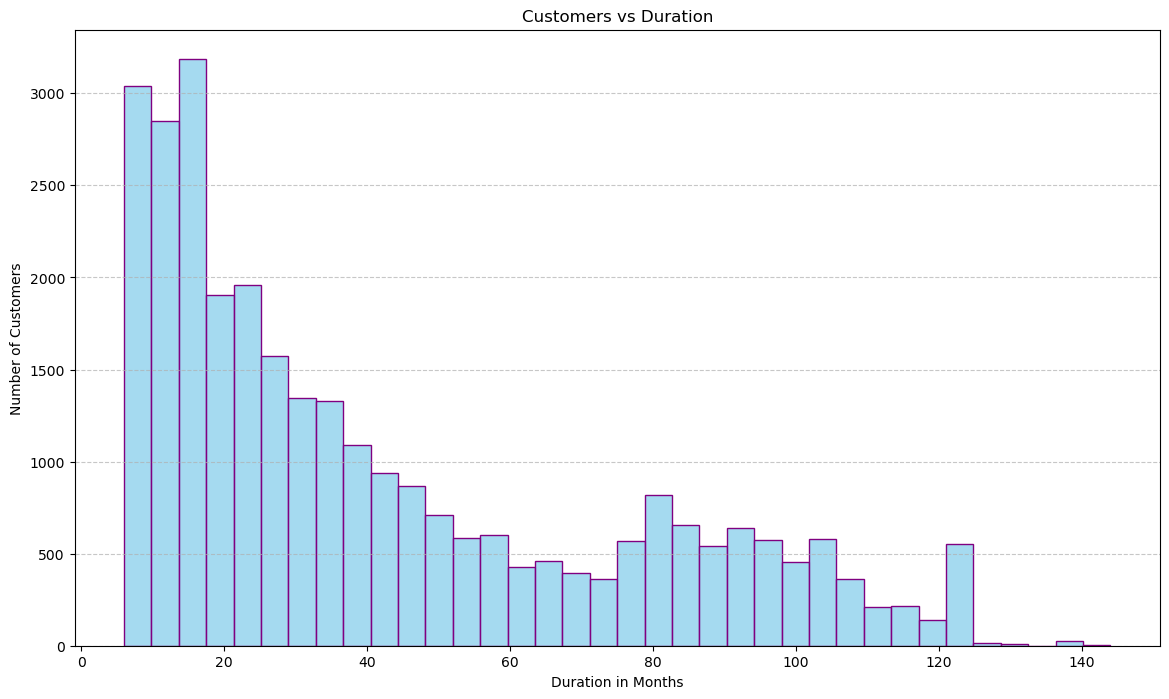

In [ ]:
# visualizing the duration_in_months

plt.figure(figsize=(14, 8)) 

ax = sns.histplot(df['duration_in_months'], bins=int(180/5), color='skyblue', edgecolor='purple')
ax.set(xlabel='Duration in Months', ylabel='Number of Customers', title='Customers vs Duration')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df['duration_in_months_range'] = pd.cut(df['duration_in_months'], bins=[0, 6, 12, 24, 60, float('inf')], labels=['0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above'])
df['duration_in_months_range'].head()


7             2-5 Yrs
8         6-12 Months
13    5 Yrs and above
16            1-2 Yrs
17            1-2 Yrs
Name: duration_in_months_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

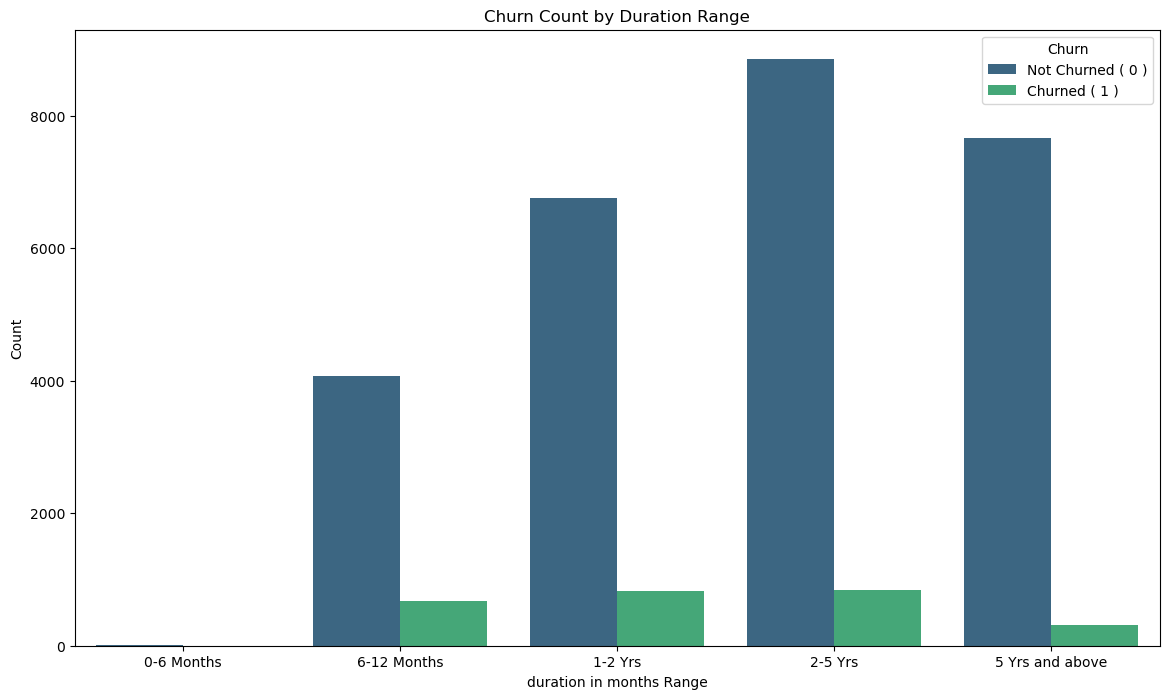

In [ ]:
# visualizing the duration in month range

plt.figure(figsize=(14, 8))
ax = sns.countplot(x='duration_in_months_range', hue='churn', data=df, palette='viridis')
ax.set(xlabel='duration in months Range', ylabel='Count', title='Churn Count by Duration Range')
ax.legend(title='Churn', labels=['Not Churned ( 0 )', 'Churned ( 1 )'])
plt.show()

In [ ]:
# Heatmap functions for visualization

def plot_correlation_heatmap(dataframe, figsize=(10, 8), cmap="viridis"):
    plt.figure(figsize=figsize)
    sns.heatmap(dataframe.corr(), cmap=cmap, annot=True)
    plt.title('Correlation Heatmap', fontsize=14)
    plt.show()

In [ ]:
# lets analyse mou feature mou - "Minutes of usage - voice calls"

cols_mou_og = [col for col in df.columns if 'og' in col and 'mou' in col]
cols_mou_og

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

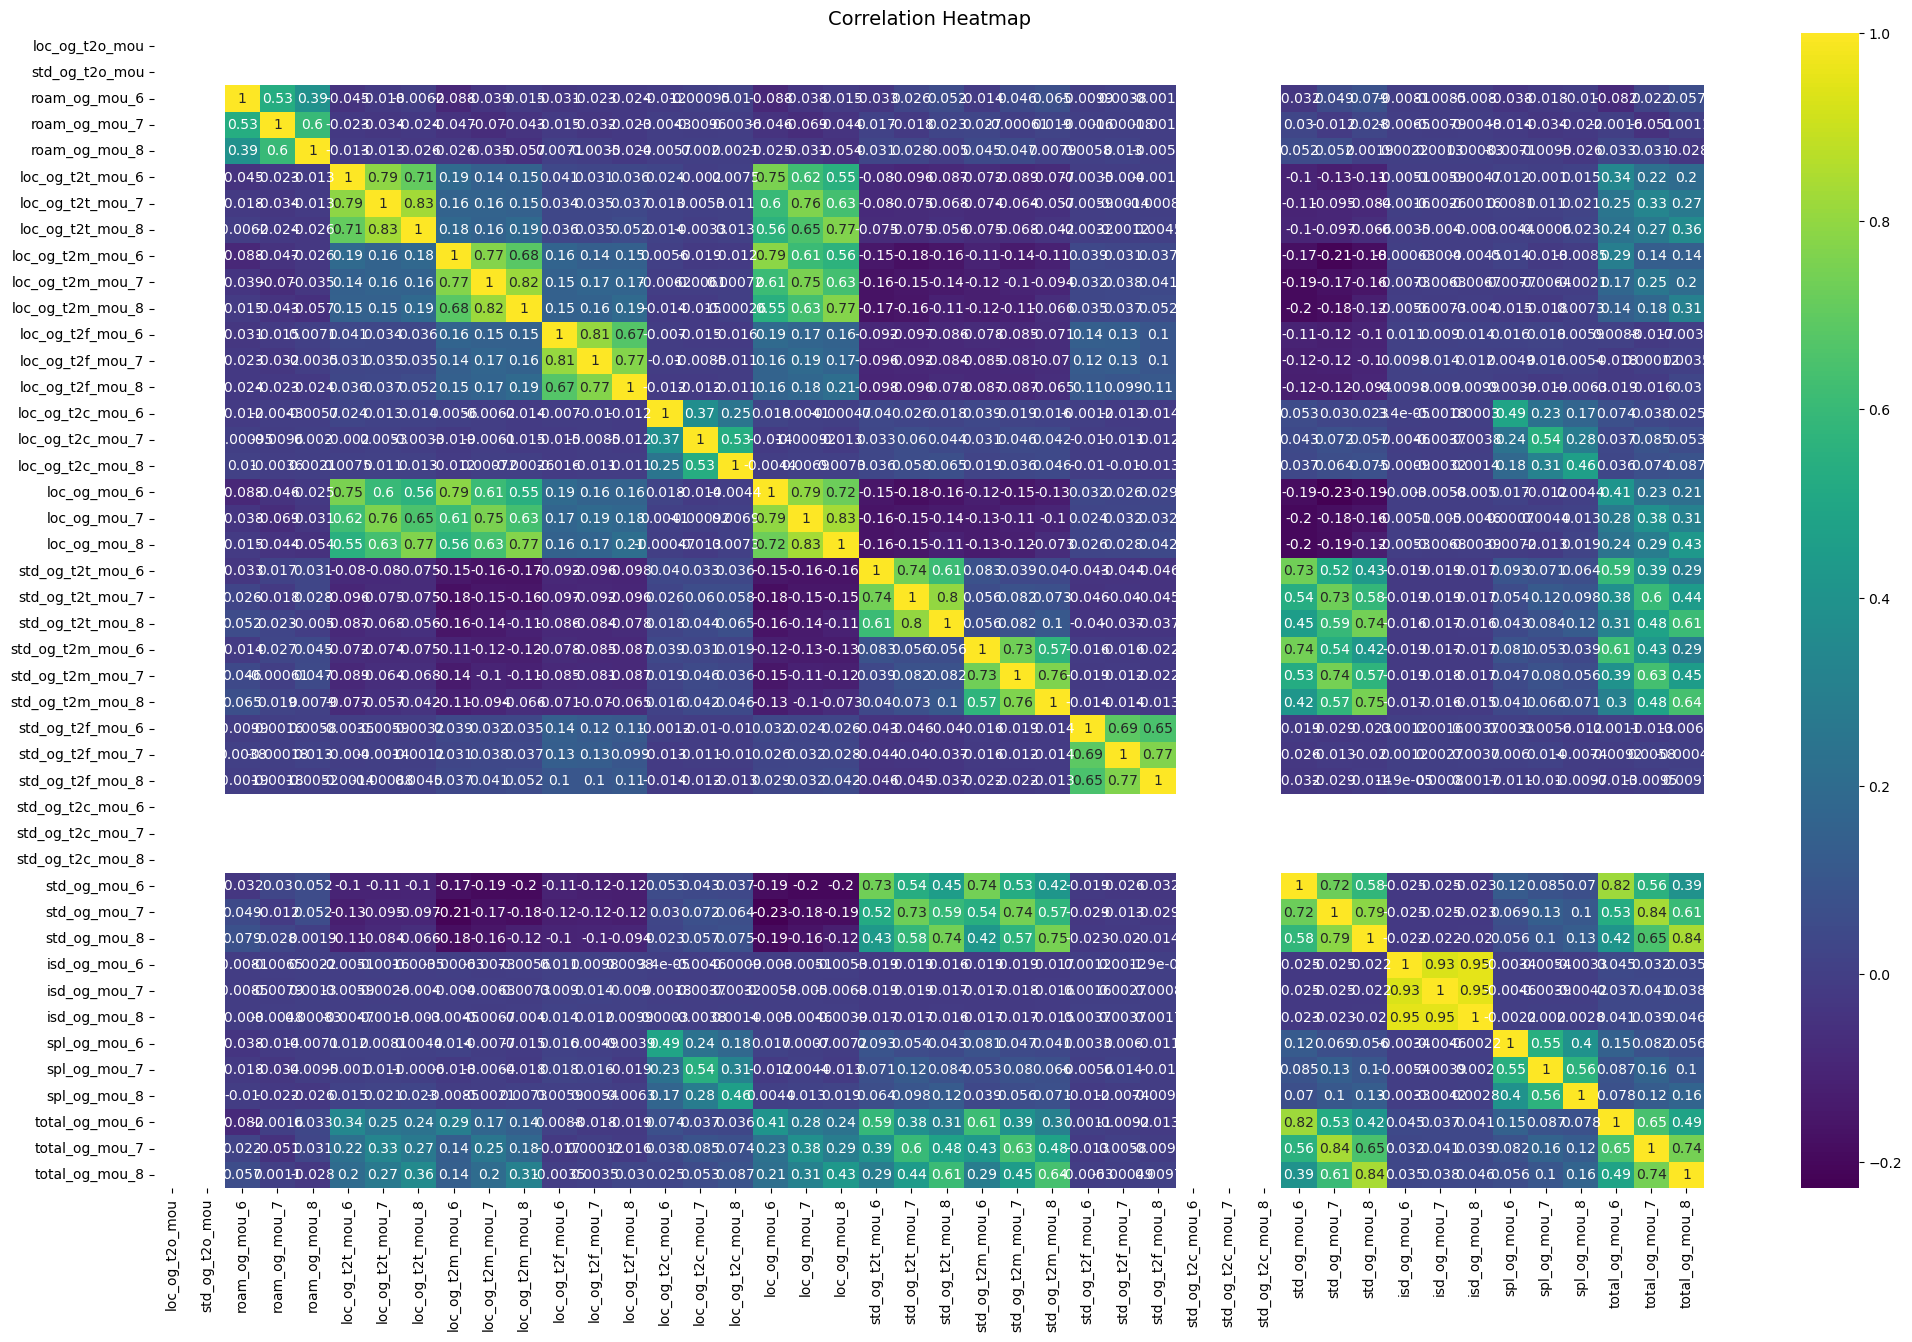

In [ ]:
# Visualizing out going calls with mou
plot_correlation_heatmap(df[cols_mou_og], figsize=(25, 15))

**Observation:** 
- We observe that `loc_og_mou_6`,`loc_og_mou_7`,`loc_og_mou_8` exhibit strong correlations with other fields, as do `std_og_mou_6`, `std_og_mou_7` ,  and `std_og_mou_8` as well as `total_og_mou_6`, `total_og_mou_7`, and `total_og_mou_8`. It is essential to inspect these columns to address potential issues related to multicollinearity.


In [ ]:
cols_mou_ic = [col for col in df.columns if 'ic' in col and 'mou' in col]
cols_mou_ic

['loc_ic_t2o_mou',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8']

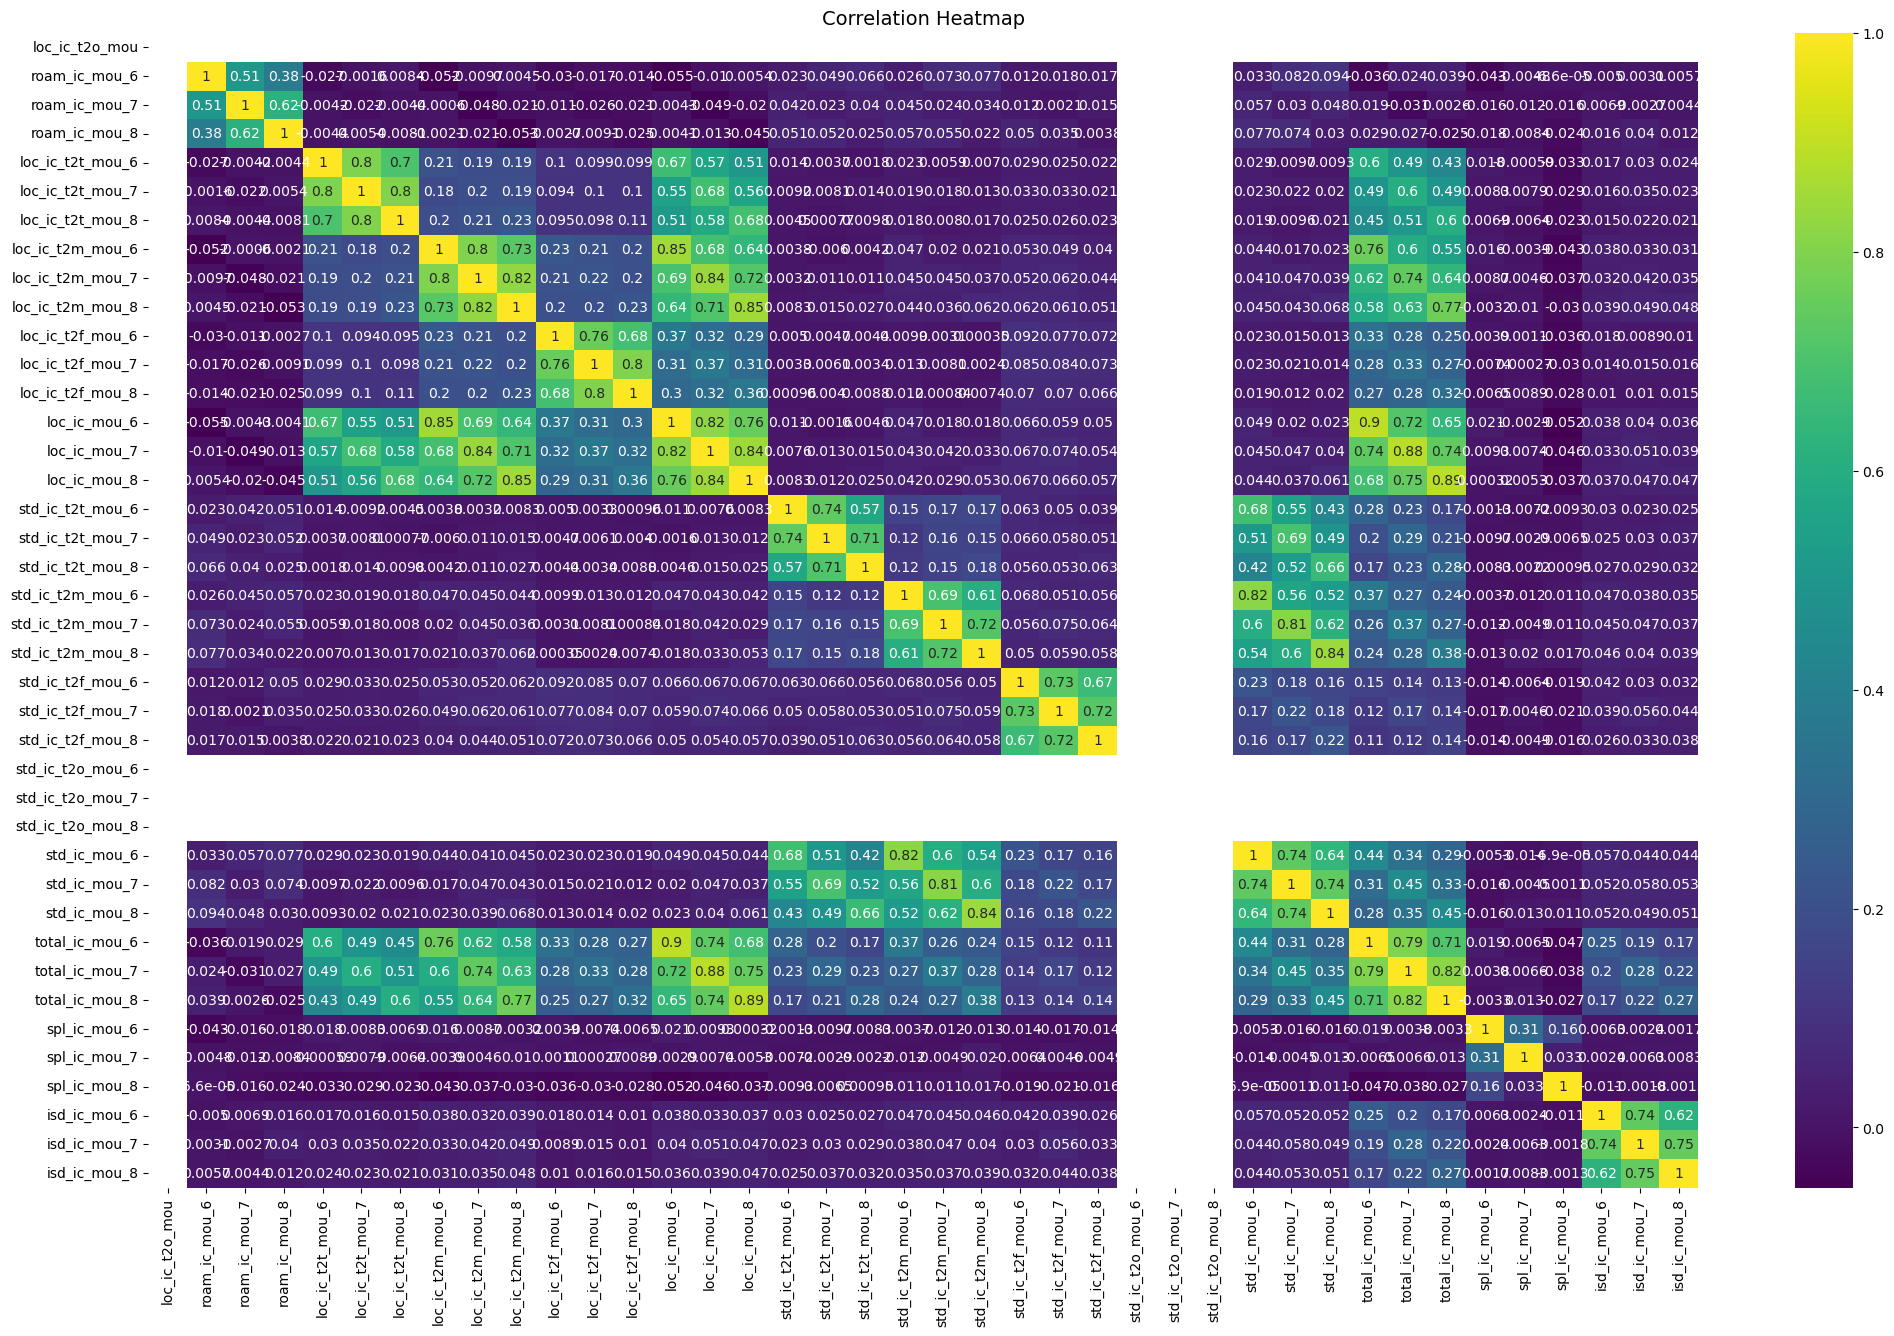

In [ ]:
# Visualizing in comming calls with mou
plot_correlation_heatmap(df[cols_mou_ic], figsize=(25, 15))

**Observation:**

- simmilar to above here We observe that `loc_ic_mou_6`,`loc_ic_mou_7`,`loc_ic_mou_8` exhibit strong correlations with other fields, as do `std_ic_mou_6`, `std_ic_mou_7` ,  and `std_ic_mou_8` as well as `total_ic_mou_6`, `total_ic_mou_7`, and `total_ic_mou_8`. It is essential to inspect these columns to address potential issues related to multicollinearity.


In [ ]:
def bar_chart_plot(col):
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 3, 1)
    sns.barplot(data=df, x="churn", y=col+"_6", hue="churn", palette="viridis")
    plt.title(f'{col}_6 Barplot')
    plt.subplot(2, 3, 2)
    sns.barplot(data=df, x="churn", y=col+"_7", hue="churn", palette="viridis")
    plt.title(f'{col}_7 Barplot')
    plt.subplot(2, 3, 3)
    sns.barplot(data=df, x="churn", y=col+"_8", hue="churn", palette="viridis")
    plt.title(f'{col}_8 Barplot')
    plt.tight_layout()
    plt.show()


In [ ]:
# visualization functions
def mean_bar_chart_plot(dataframe, columns_list):
    dataframe_0 = dataframe[dataframe.churn == 0].filter(columns_list)
    dataframe_1 = dataframe[dataframe.churn == 1].filter(columns_list)
    mean_dataframe_0 = pd.DataFrame([dataframe_0.mean()], index=['Non Churn'])
    mean_dataframe_1 = pd.DataFrame([dataframe_1.mean()], index=['Churn'])
    frames = [mean_dataframe_0, mean_dataframe_1]
    mean_bar = pd.concat(frames)
    colors = sns.color_palette('viridis', n_colors=2)
    ax = mean_bar.T.plot.bar(figsize=(12, 6), rot=0, color=colors)
    ax.set_xlabel('Columns')
    ax.set_ylabel('Mean Values')
    ax.set_title('Mean Values Comparison for Churn vs Non Churn')

    plt.show()

    return mean_bar


### 3.2 Data Visualization

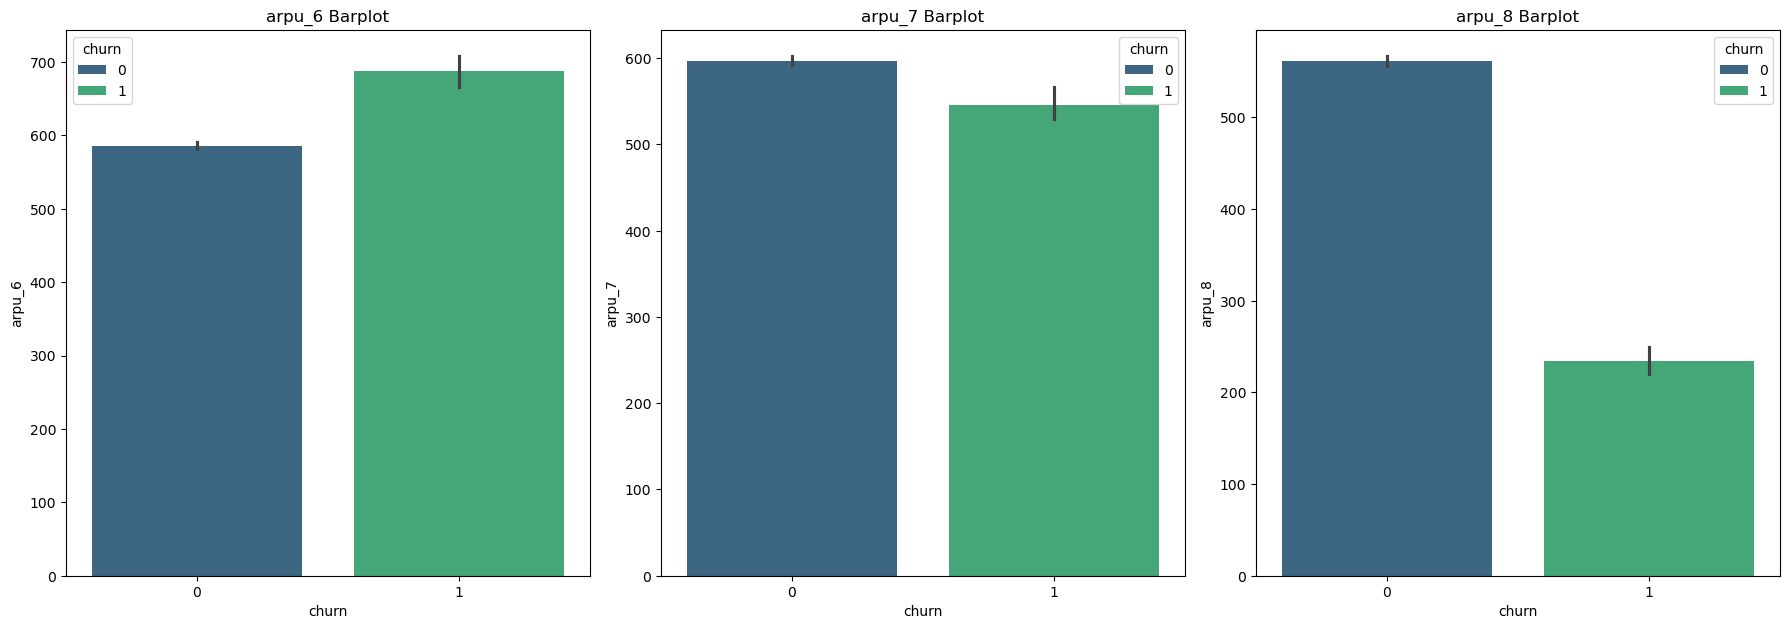

In [ ]:
# visualizing arpu - 'Average revenue per user'

bar_chart_plot('arpu')

The average revenue per user has noticeably decreased in the month of September.


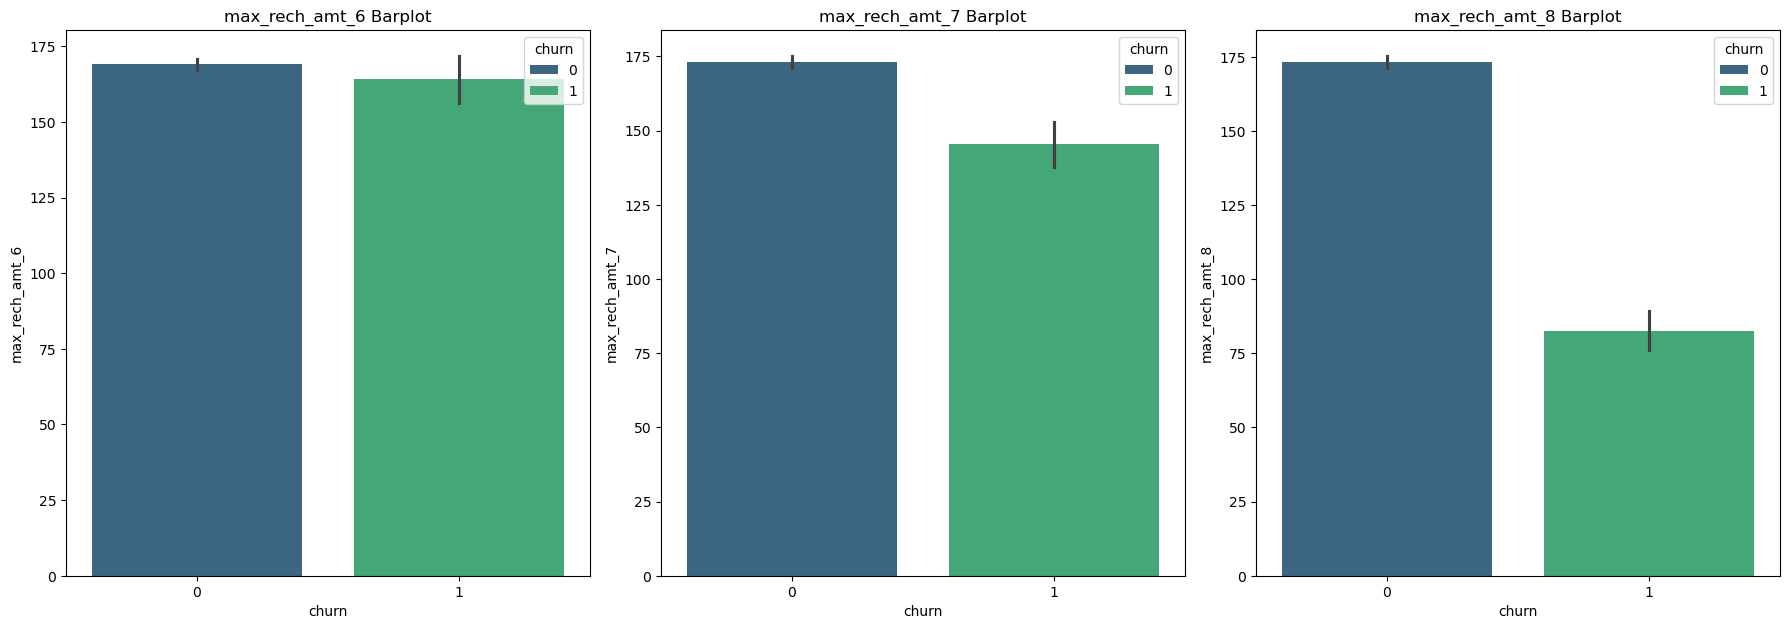

In [ ]:
# Visualizing for Maximum recharge amount for data:

bar_chart_plot('max_rech_amt')

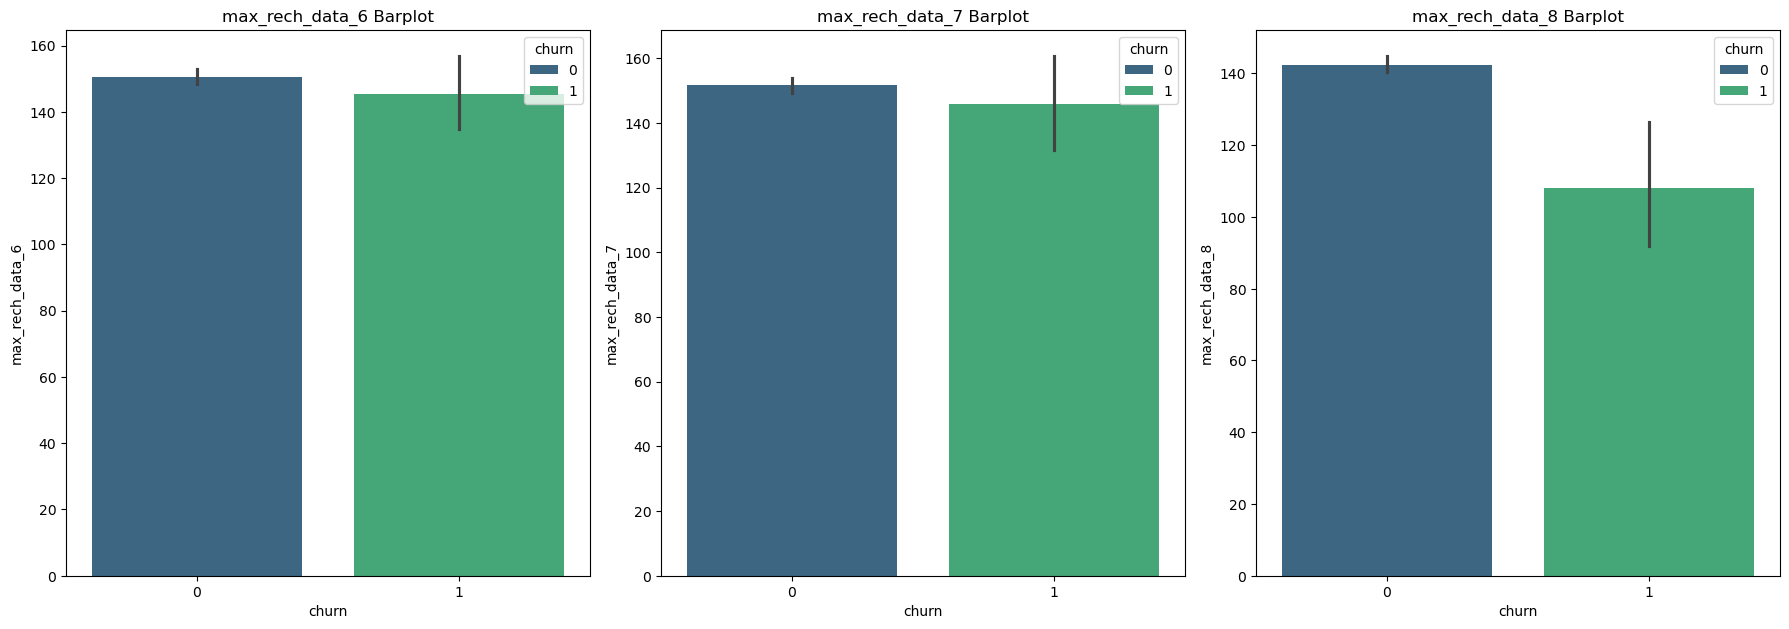

In [ ]:
# Visualizing for Maximum recharge data

bar_chart_plot('max_rech_data')

**Observation:**
- The Max Reacharge Amount and Max Data Reacharge has markedly declined in the month of September.

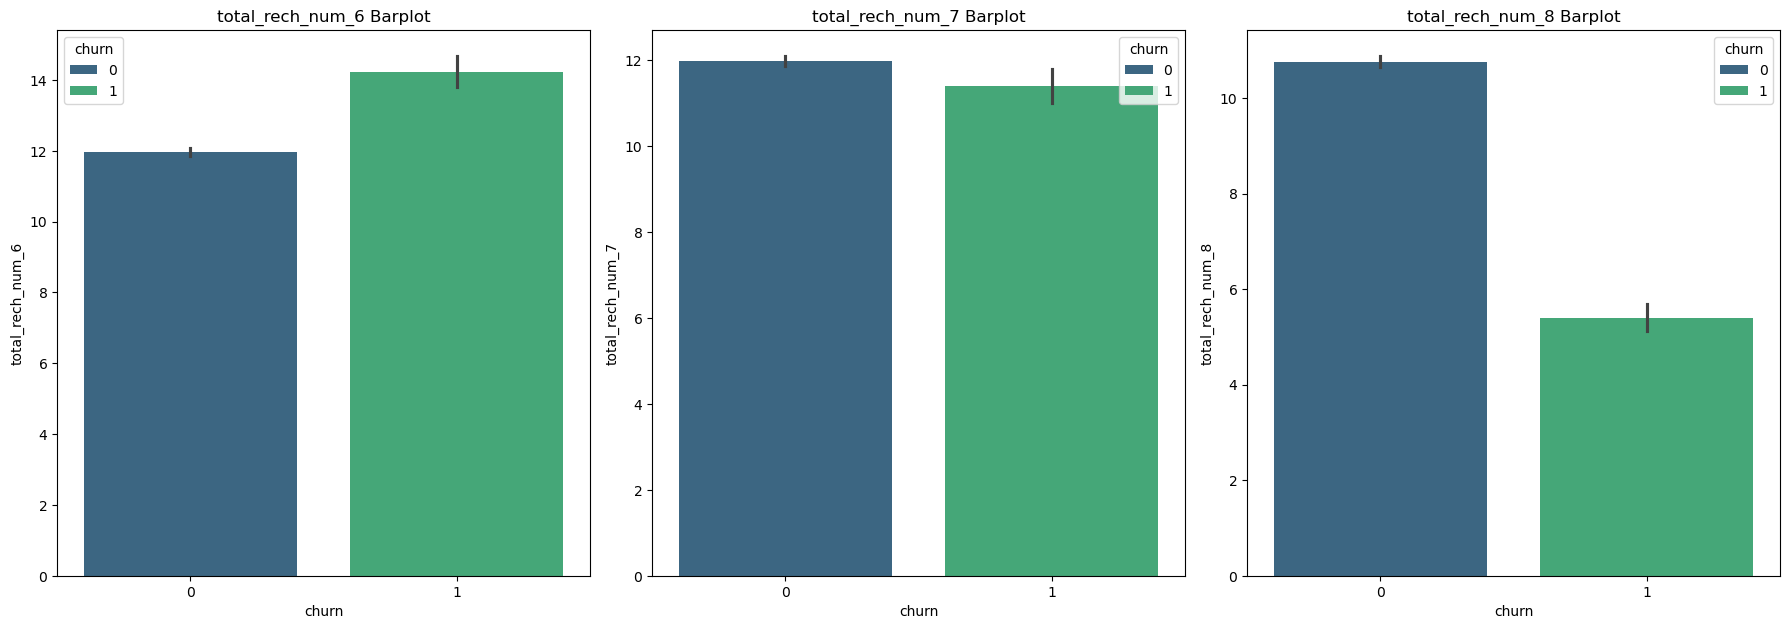

In [ ]:
# Visualizing for Total number of rechargs

bar_chart_plot('total_rech_num')

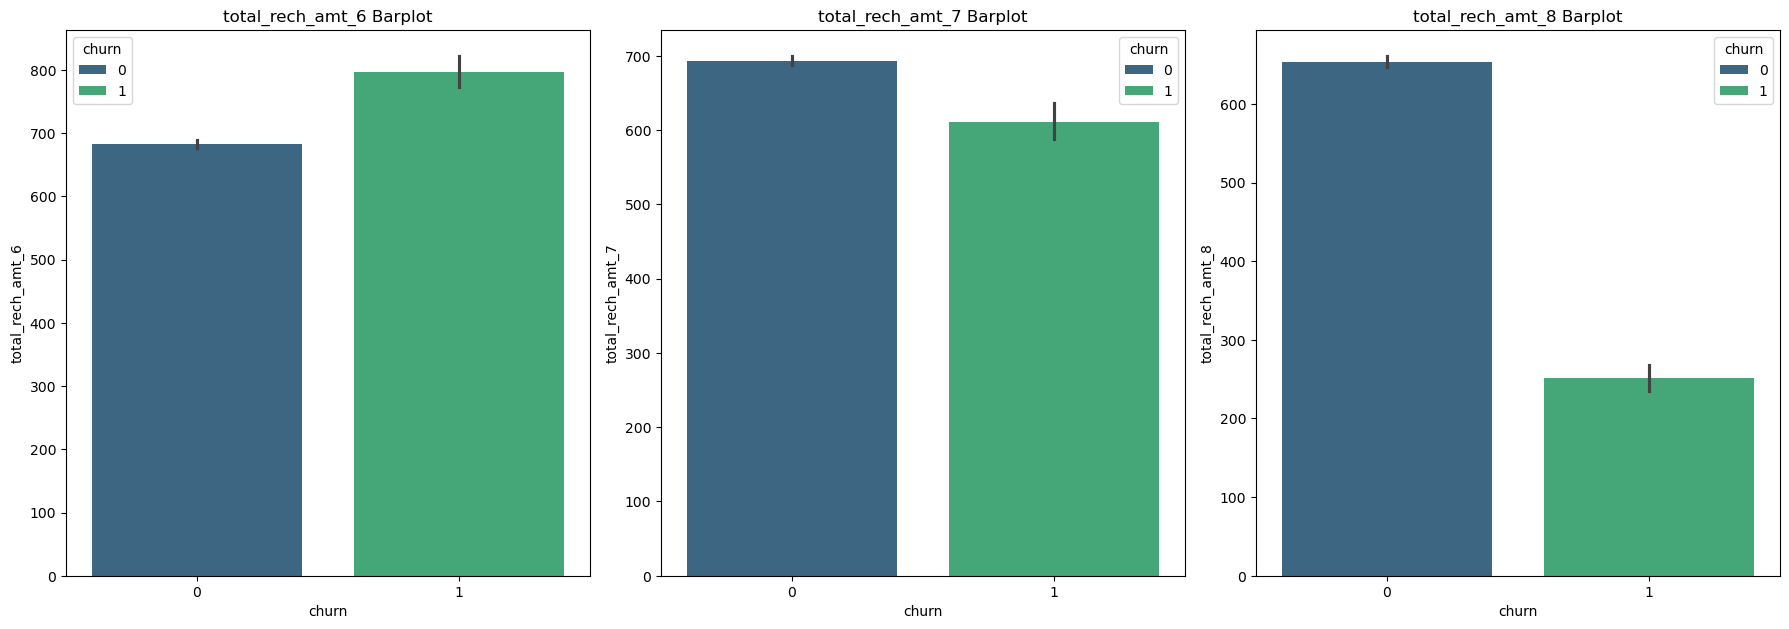

In [ ]:
# Visualizing for Total reachar amount

bar_chart_plot('total_rech_amt')

**Observation**: 

- Again we can see there is a same pattern decline in `total_rech_amt`, `total_rech_num`  in the action phase.

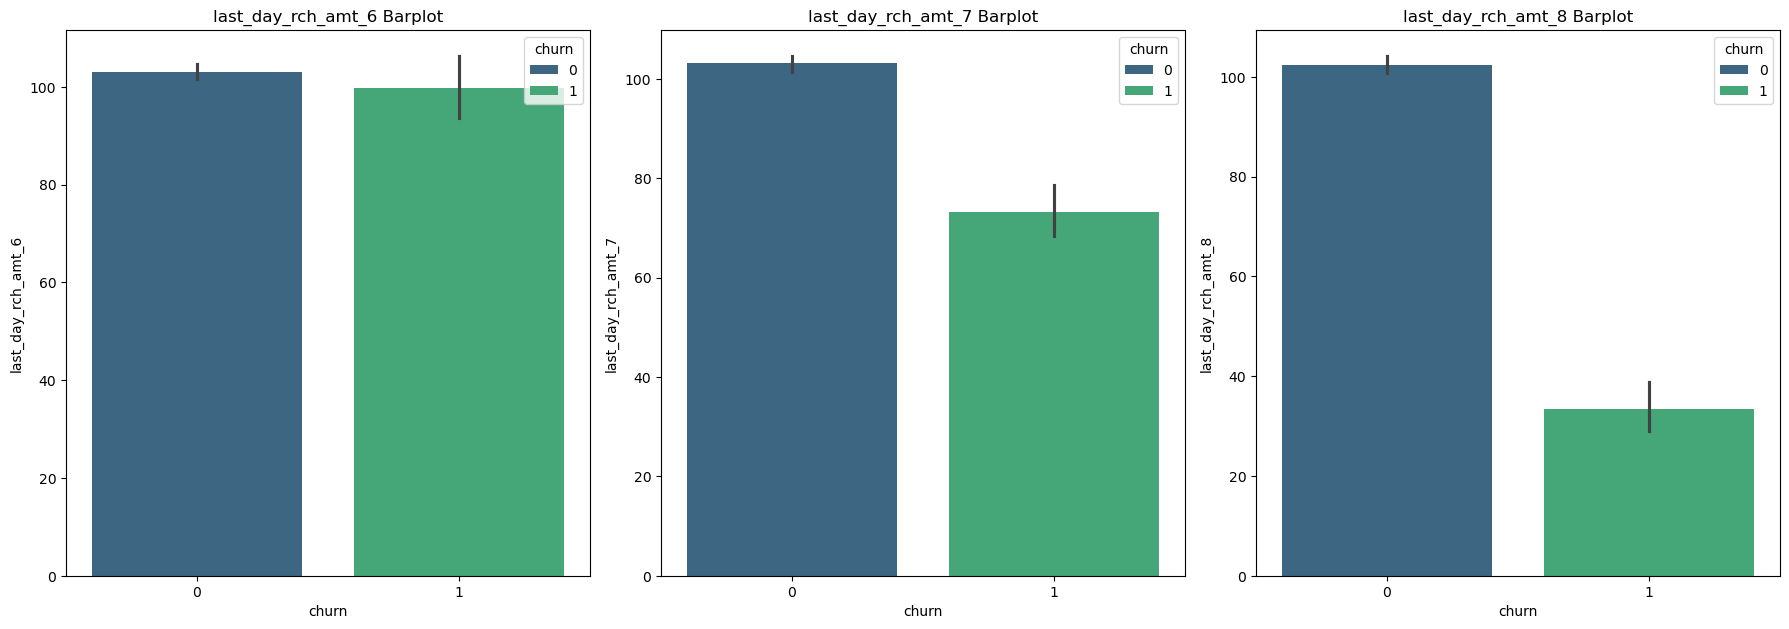

In [ ]:
# Visualizing the Reacharge amount of the last day

bar_chart_plot('last_day_rch_amt')

**Observation:**
- We can see a gradual decrease in the reacharge amount in the last days of chaurn in the month of action phase (september month)

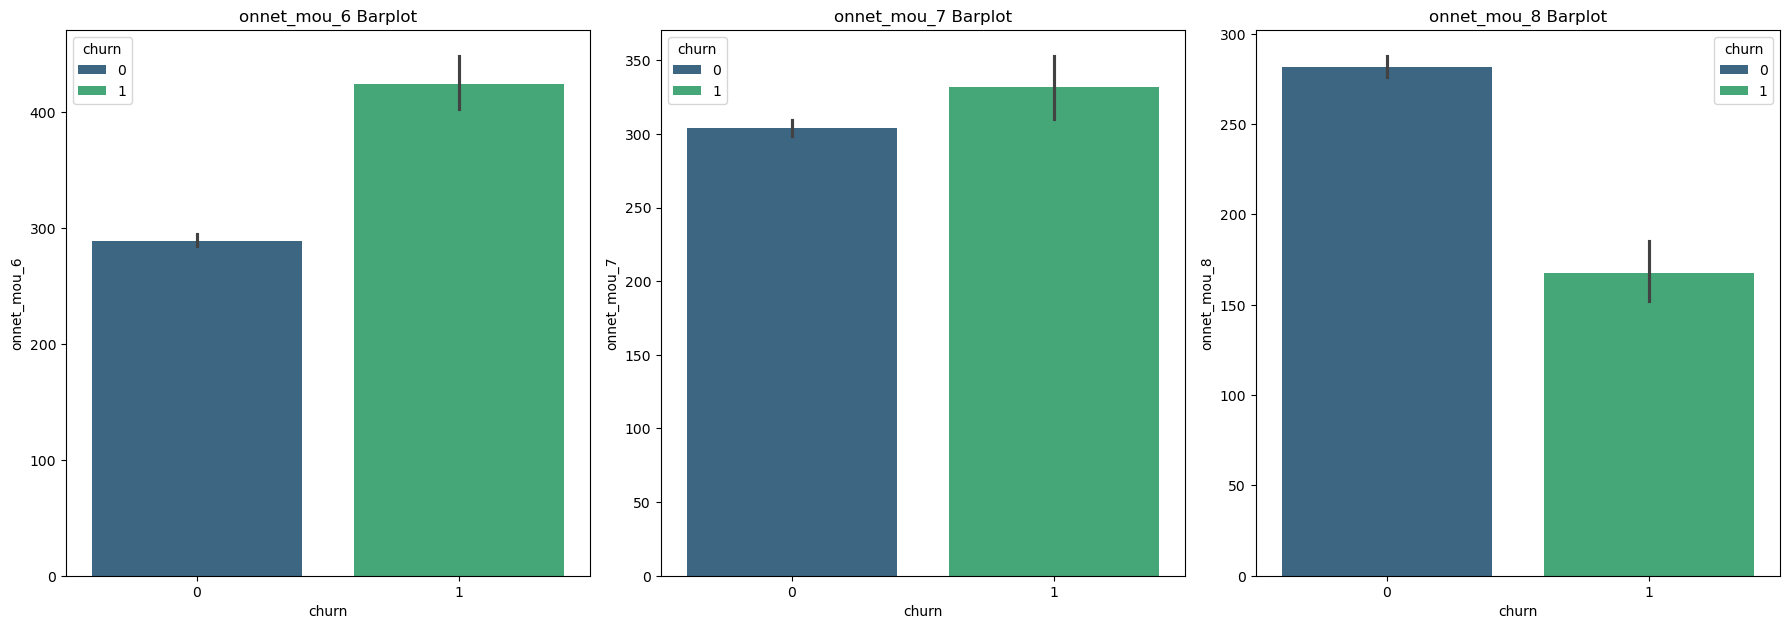

In [ ]:
# Visualizing the All kind of calls within the same operator network

bar_chart_plot('onnet_mou')

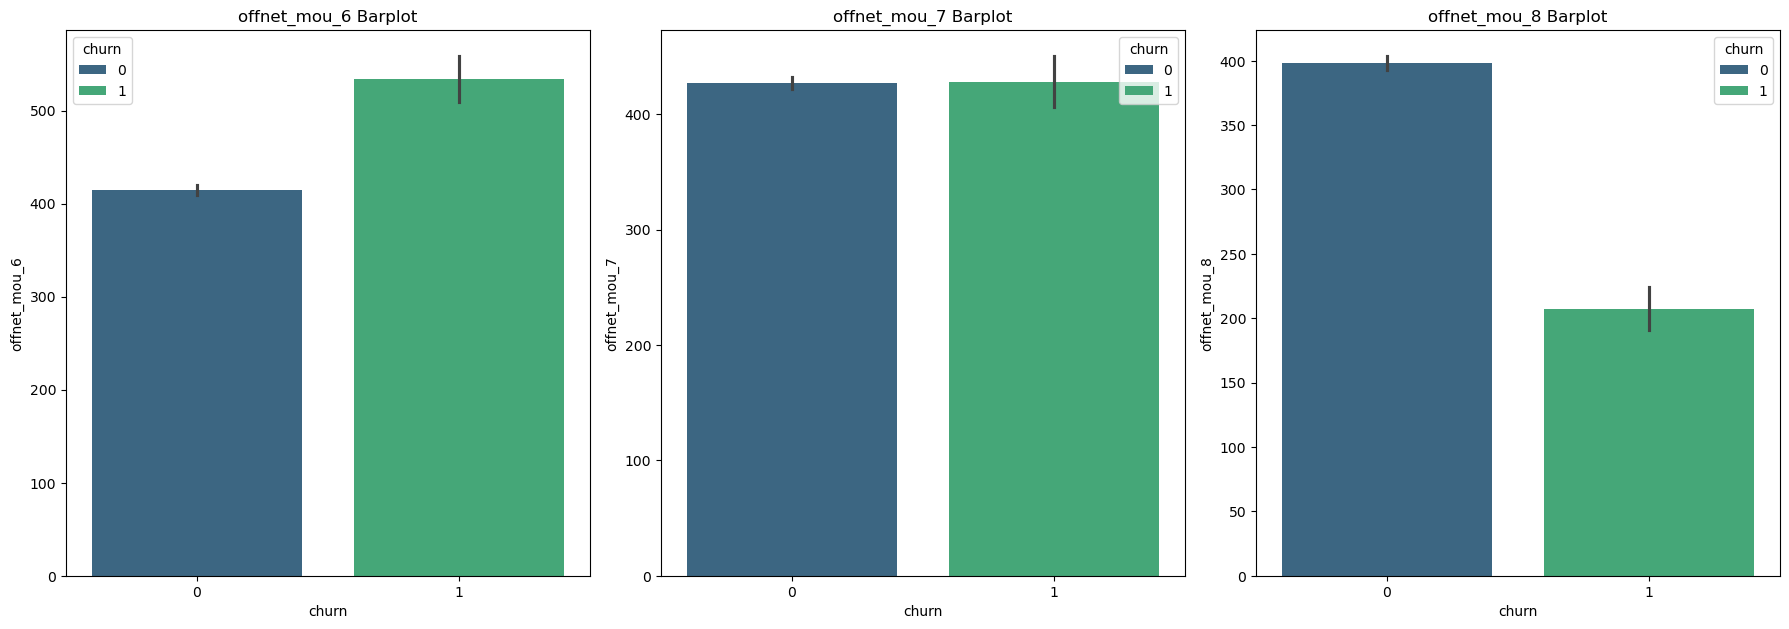

In [ ]:
# Visualizing the All kind of calls outside the operator T network

bar_chart_plot('offnet_mou')

**Observation:**

- A noticeable decrease is observed in on-net minutes of usage services during the 8th month.
- There is a decline in off-net minutes of usage services in the 8th month.

In [ ]:
data_2g_3g = df.columns[df.columns.str.contains('2g|3g',regex=True)]
data_2g_3g

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6'],
      dtype='object')

In [ ]:
df[data_2g_3g].isnull().sum()

count_rech_2g_6    18453
count_rech_2g_7    18221
count_rech_2g_8    18104
count_rech_3g_6    18453
count_rech_3g_7    18221
count_rech_3g_8    18104
vol_2g_mb_6            0
vol_2g_mb_7            0
vol_2g_mb_8            0
vol_3g_mb_6            0
vol_3g_mb_7            0
vol_3g_mb_8            0
arpu_3g_6          18453
arpu_3g_7          18221
arpu_3g_8          18104
arpu_2g_6          18453
arpu_2g_7          18221
arpu_2g_8          18104
monthly_2g_6           0
monthly_2g_7           0
monthly_2g_8           0
sachet_2g_6            0
sachet_2g_7            0
sachet_2g_8            0
monthly_3g_6           0
monthly_3g_7           0
monthly_3g_8           0
sachet_3g_6            0
sachet_3g_7            0
sachet_3g_8            0
vbc_3g_8               0
vbc_3g_7               0
vbc_3g_6               0
dtype: int64

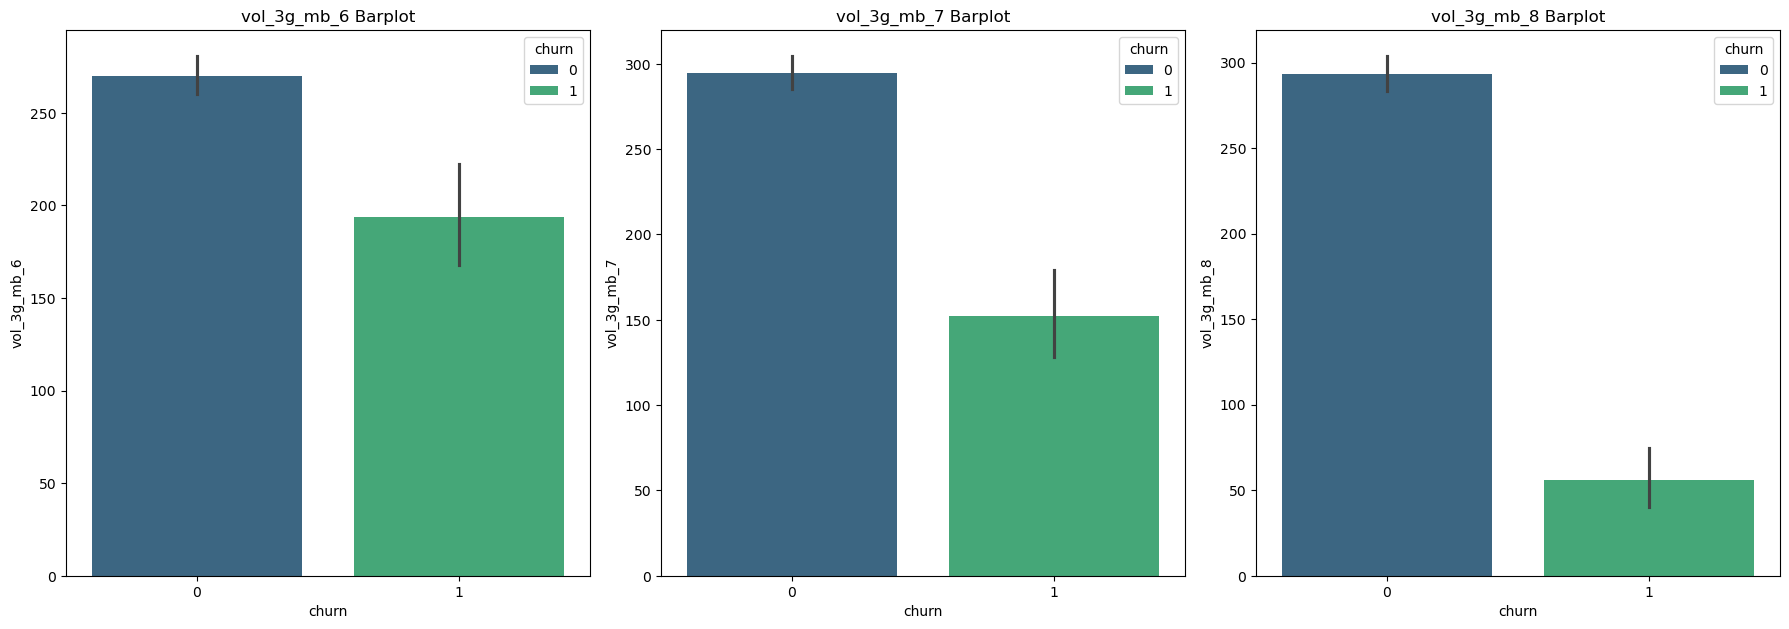

In [ ]:
# Visualizing the Mobile internet usage volume (in MB for 3g network)

bar_chart_plot('vol_3g_mb')

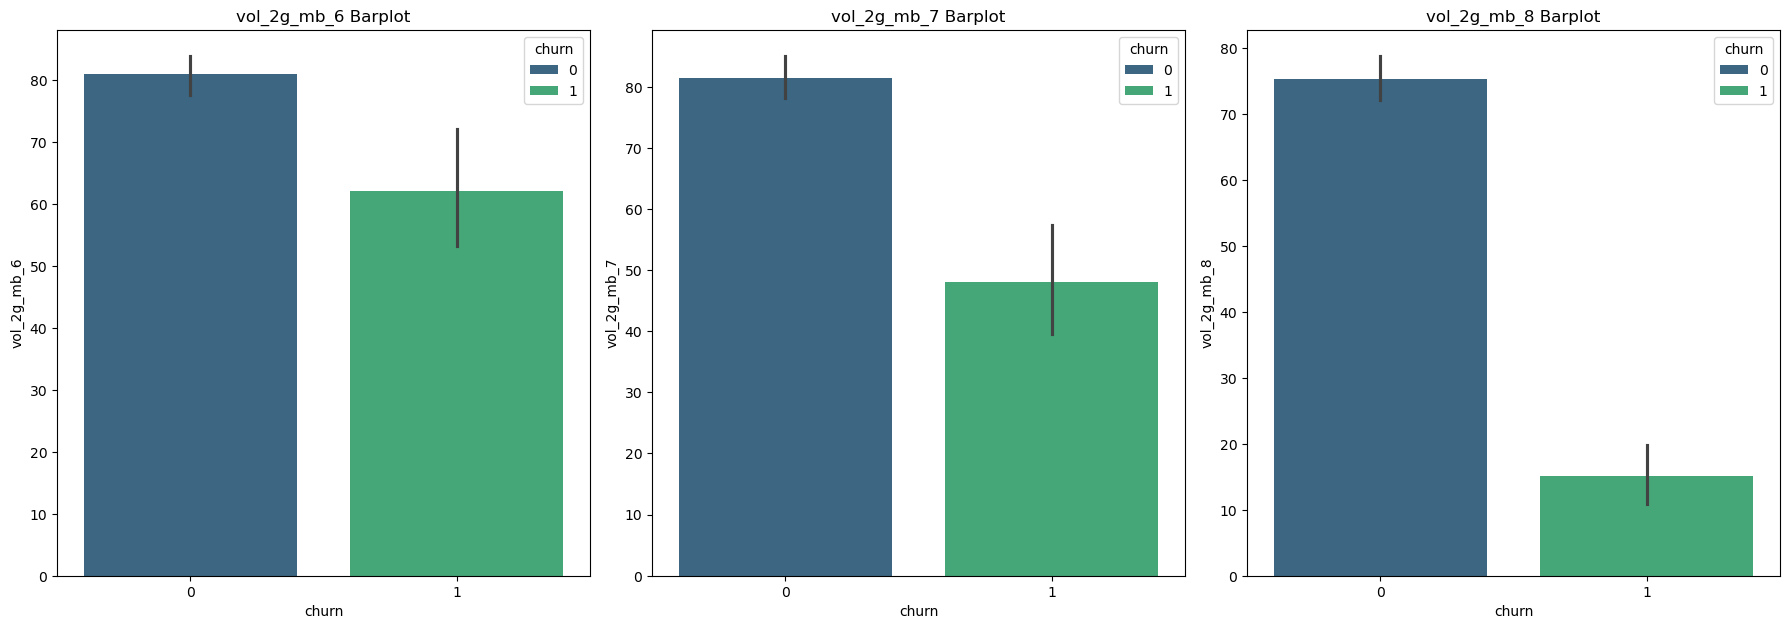

In [ ]:
# Visualizing the Mobile internet usage volume (in MB for 2g network)

bar_chart_plot('vol_2g_mb')

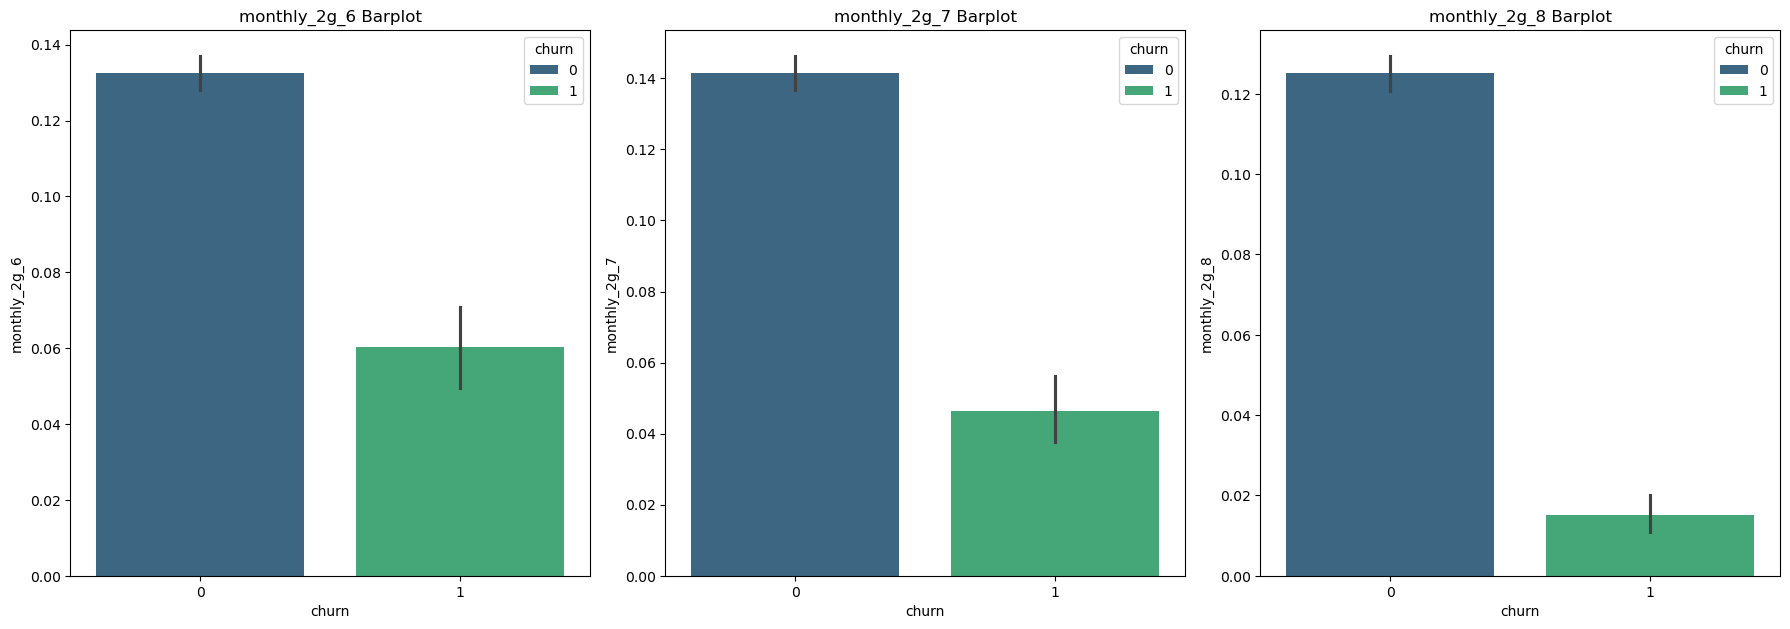

In [ ]:
# Visualizing the monthly internet usage volume (in MB for 2g network)

bar_chart_plot('monthly_2g')

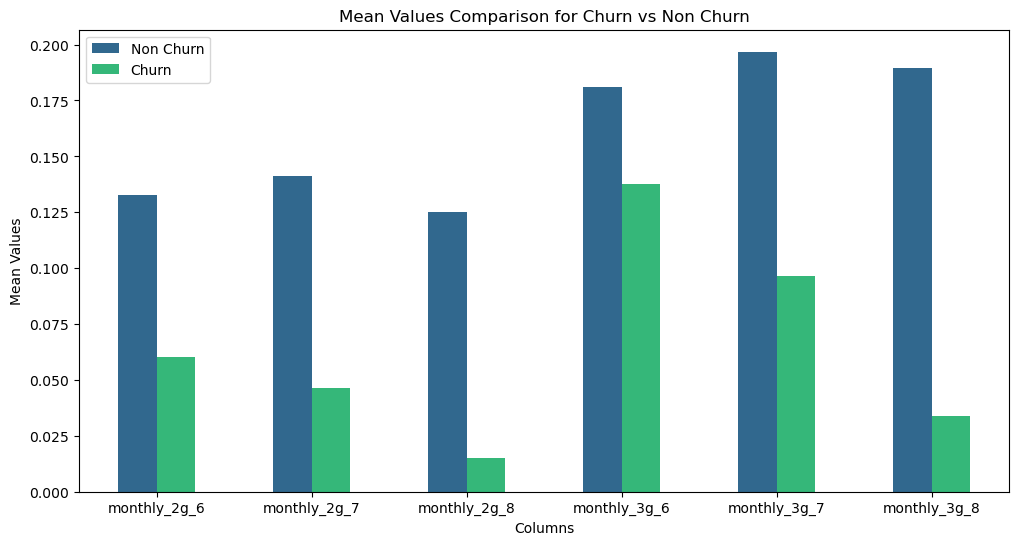

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.132624,0.14140,0.125165,0.180964,0.196870,0.189301
Churn,0.060332,0.04638,0.015083,0.137632,0.096531,0.033937


In [ ]:
# Visualizing the monthly internet usage volume (in MB for 3g network)

# bar_chart_plot('monthly_3g')
monthy_data = ['monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8']
mean_bar_chart_plot(df, monthy_data)

In [ ]:
sachet_2g_3g = df.columns[df.columns.str.contains('sachet_2g|sachet_3g',regex=True)]
sachet_2g_3g.tolist()

['sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8']

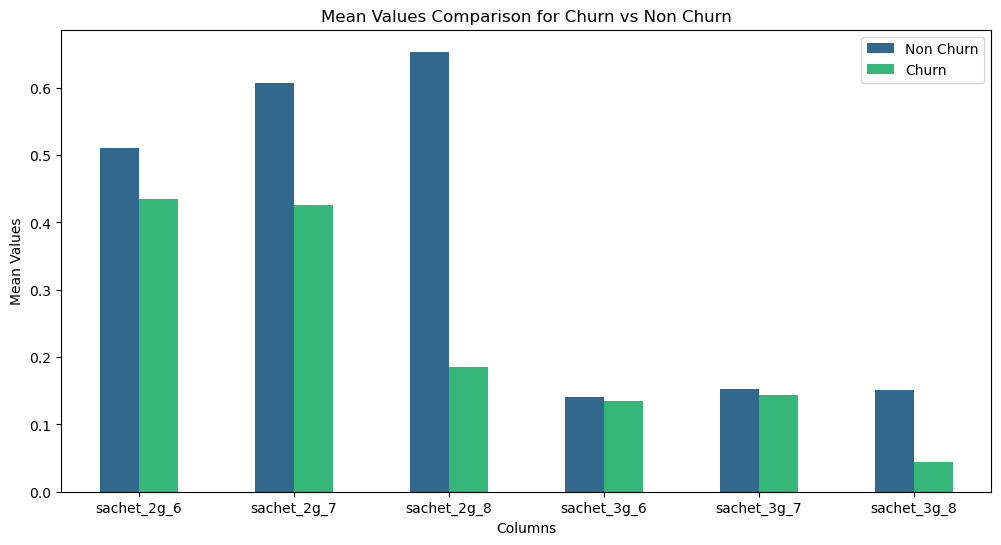

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,0.509873,0.607028,0.653576,0.140998,0.153064,0.151419
Churn,0.434766,0.425716,0.184766,0.134238,0.143665,0.044118


In [ ]:
# Visualizing the monthly internet usage volume (in MB for 2g network)

mean_bar_chart_plot(df, sachet_2g_3g)

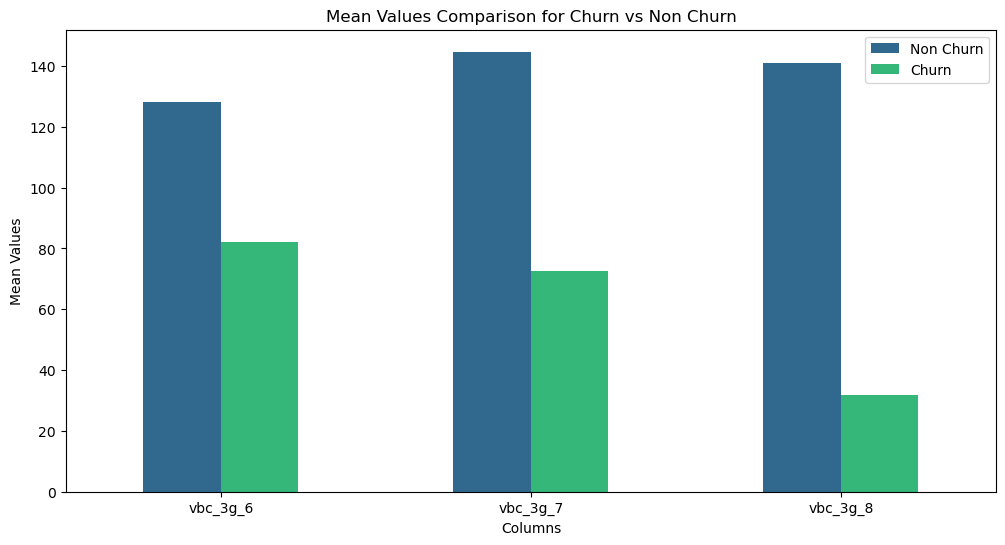

,vbc_3g_6,vbc_3g_7,vbc_3g_8
Non Churn,128.176281,144.743589,141.013983
Churn,81.995351,72.479706,31.724287


In [ ]:
# Visualizing the Volume based cost - when no specific scheme is not purchased and paid as per usage

vbc_column = ['vbc_3g_6','vbc_3g_7','vbc_3g_8']
mean_bar_chart_plot(df, vbc_column)

**Observation**:

- The internet consumption shows a gradual decrease over the three months, transitioning from the good phase to the action phase.

In [ ]:
# lets drop the column duration_in_months_range

df.drop(['duration_in_months_range'],axis=1,inplace=True)

In [ ]:
df['churn'].value_counts(normalize=True) * 100

churn
0    91.16
1     8.84
Name: proportion, dtype: float64

**Observation:**

- There is a huge class imbalance in the churn distrubution which might affect the prediction due to the baised data, We need to handle the churn distrubution while train the model.

In [ ]:
df['rech_num_diff'] = (df['total_rech_num_6'] + df['total_rech_num_7'])/2 - df['total_rech_num_8']

In [ ]:
def reach_diff(col):
    sns.boxplot(data = df, y=col, x='churn')
    plt.show()
    sns.lineplot(df[df.churn==0][col], legend='brief', label='non churn')
    sns.lineplot(df[df.churn==1][col], legend='brief', label='churn')
    plt.show()

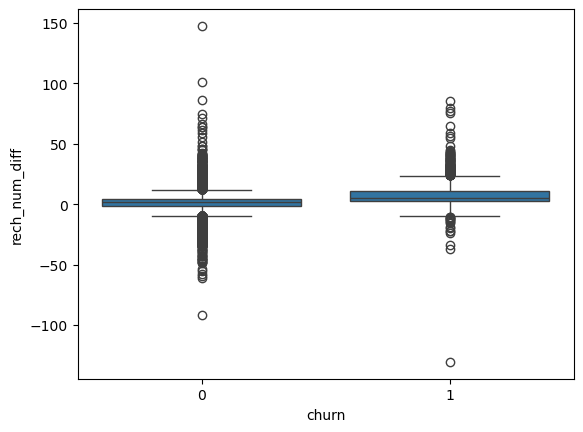

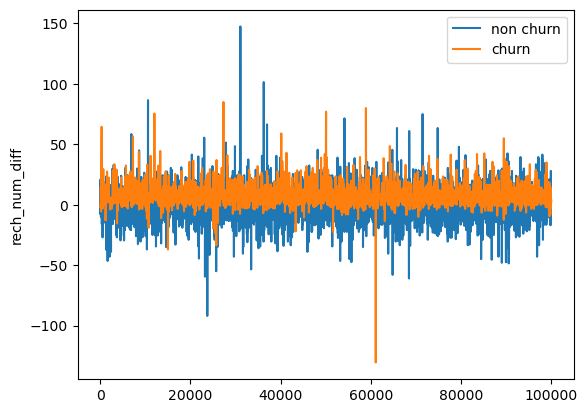

In [ ]:
reach_diff("rech_num_diff")

[]

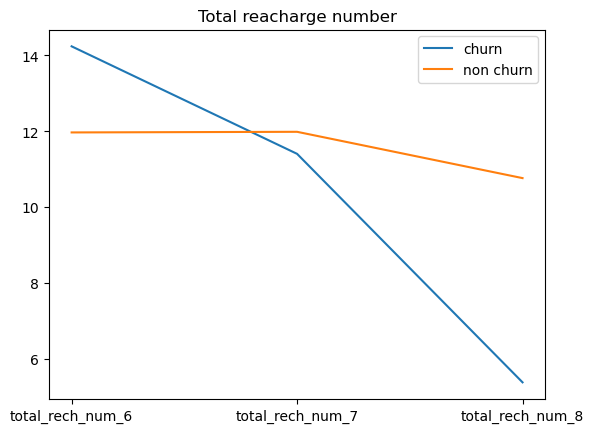

In [ ]:
sns.lineplot(df[df.churn==1][['total_rech_num_6','total_rech_num_7','total_rech_num_8']].mean(), legend='brief', label='churn')
sns.lineplot(df[df.churn==0][['total_rech_num_6','total_rech_num_7','total_rech_num_8']].mean(), legend='brief', label='non churn')
plt.title("Total reacharge number")
plt.plot()

In [ ]:
df['rech_amt_diff'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2 - df['total_rech_amt_8']

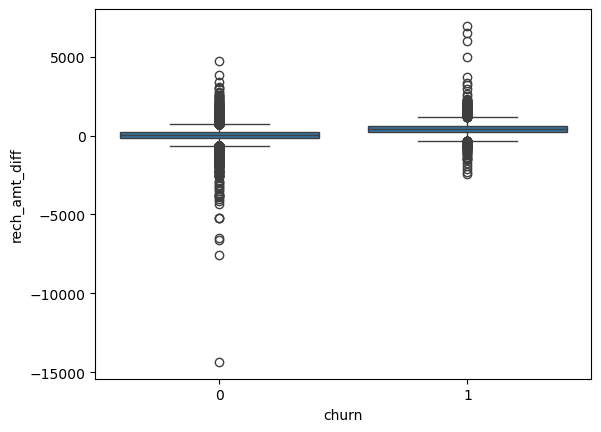

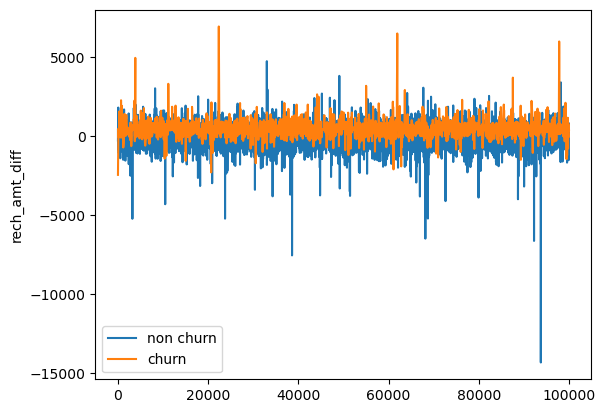

In [ ]:
reach_diff("rech_amt_diff")

[]

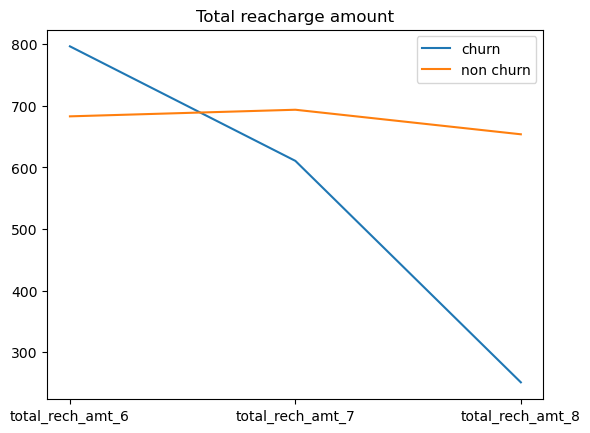

In [ ]:
sns.lineplot(df[df.churn==1][['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].mean(), legend='brief', label='churn')
sns.lineplot(df[df.churn==0][['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].mean(), legend='brief', label='non churn')
plt.title("Total reacharge amount")
plt.plot()

**Oberservation:**
- The number and total recharge amount, both show a similar trend where it starts higher for 6th month and gradually keeps decreasing each month whereas for non-churners, it starts a little lower but stays pretty much stable.

In [ ]:
col_list = []
for col in df.columns:
    if not '_6' in col and not '_7' in col and not '_8' in col:
        col_list.append(col)
print(col_list)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'aon', 'churn', 'duration_in_months', 'rech_num_diff', 'rech_amt_diff']


In [ ]:
df[col_list].describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,aon,churn,duration_in_months,rech_num_diff,rech_amt_diff
count,3.000000e+04,30000.0,29872.0,29872.0,29872.0,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000
mean,7.001223e+09,109.0,0.0,0.0,0.0,1266.026833,0.08840,42.200894,1.761350,71.445767
std,6.847807e+05,0.0,0.0,0.0,0.0,977.212434,0.28388,32.573748,6.985562,427.840982
min,7.000000e+09,109.0,0.0,0.0,0.0,180.000000,0.00000,6.000000,-130.500000,-14344.500000
25%,7.000641e+09,109.0,0.0,0.0,0.0,479.000000,0.00000,15.966667,-1.000000,-115.000000
50%,7.001234e+09,109.0,0.0,0.0,0.0,912.500000,0.00000,30.416667,1.500000,60.500000
75%,7.001815e+09,109.0,0.0,0.0,0.0,1935.250000,0.00000,64.508333,4.000000,262.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,4321.000000,1.00000,144.033333,147.500000,6950.000000


<Axes: >

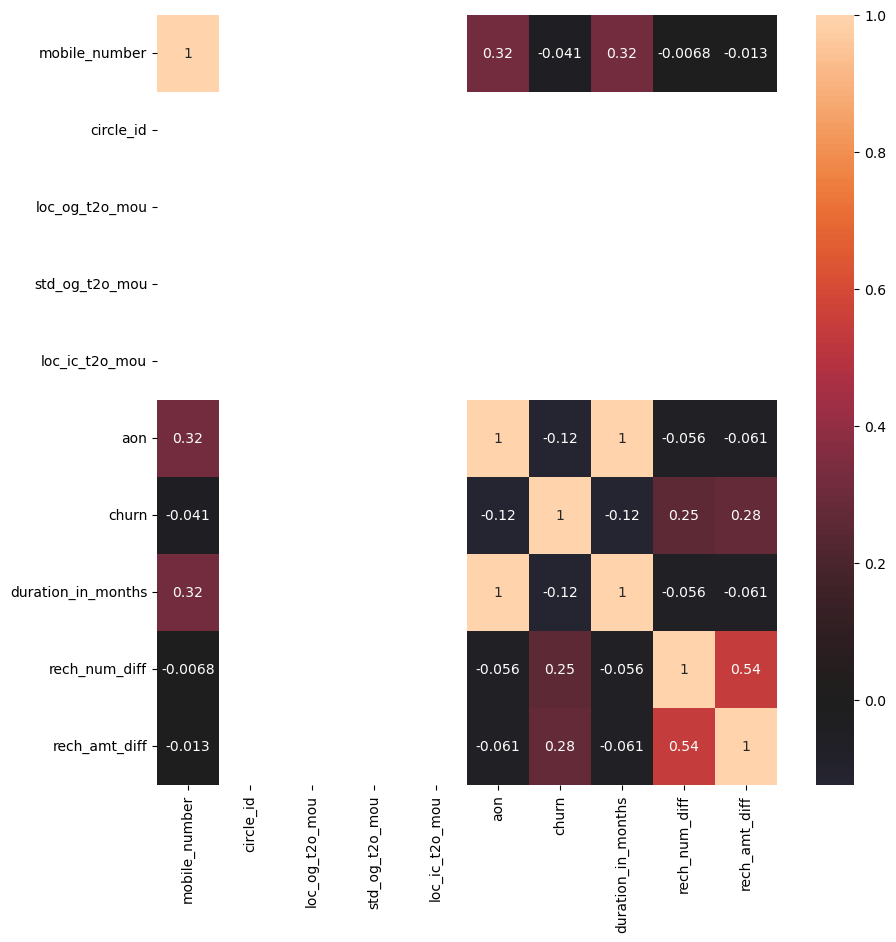

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[col_list].corr(), annot=True, center=0)

In [ ]:
df.circle_id.value_counts()

circle_id
109    30000
Name: count, dtype: int64

In [ ]:
data.circle_id.value_counts()

circle_id
109    99999
Name: count, dtype: int64

### 3.3 Data cleaning

In [ ]:
cat_columns = df.dtypes[~(df.dtypes == 'int64') & ~(df.dtypes == 'float64')].keys()
num_columns = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].keys()

#### Removing columns with zero or low variance

In [ ]:
#categorical columns
description = df.describe(include="all")
threshold = 0.95 #if frequency of the most frequent value is 95% we will drop the column
columns_to_drop = []

for column in df[cat_columns].columns:
    if (
        "count" in description[column]
        and "freq" in description[column]
        and description[column]["freq"] / description[column]["count"] > threshold
    ):
        columns_to_drop.append(column)

print(columns_to_drop)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']


In [ ]:
df = df.drop(columns_to_drop, axis=1)

In [ ]:
#numeric columns
variance = df[num_columns].var()
low_variance_columns = variance[variance < threshold].index.tolist()
low_variance_columns

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn']

In [ ]:
#remove churn from the list
low_variance_columns = low_variance_columns[:-1]

In [ ]:
low_variance_columns

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [ ]:
df = df.drop(low_variance_columns, axis=1)

Removing mobile number as it is unique.

In [ ]:
df = df.drop("mobile_number", axis=1)

In [ ]:
df.describe(include="all")

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_arpu_6_7,churn,duration_in_months,rech_num_diff,rech_amt_diff
count,30000.000000,30000.000000,30000.000000,29686.000000,29666.000000,28976.000000,29686.00000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.00000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,30000.000000,30000.000000,30000.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,30000.000000,30000.000000,30000.000000,29686.000000,29666.000000,28976.000000,29686.000000,29666.000000,28976.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0000,30000.000000,11547.000000,11779.000000,11896.000000,11547.000000,11779.000000,11896.000000,11547.000000,11779.000000,11896.000000,11547.000000,11779.000000,11896.000000,11547.000000,11779.000000,11896.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,11547.000000,11779.000000,11896.000000,11547.000000,11779.000000,11896.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3

In [ ]:
df.shape

(30000, 146)

In [ ]:
for col in df.columns:
    if "date" in col:
        print(col)

date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8


In [ ]:
df[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6','date_of_last_rech_data_7', 'date_of_last_rech_data_8']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 7 to 99998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_of_last_rech_6       30000 non-null  float64
 1   date_of_last_rech_7       30000 non-null  float64
 2   date_of_last_rech_8       30000 non-null  float64
 3   date_of_last_rech_data_6  30000 non-null  float64
 4   date_of_last_rech_data_7  30000 non-null  float64
 5   date_of_last_rech_data_8  30000 non-null  float64
dtypes: float64(6)
memory usage: 1.6 MB


In [ ]:
((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False)

av_rech_amt_data_6          61.510000
arpu_3g_6                   61.510000
count_rech_3g_6             61.510000
count_rech_2g_6             61.510000
max_rech_data_6             61.510000
arpu_2g_6                   61.510000
total_rech_data_6           61.510000
av_rech_amt_data_7          60.736667
count_rech_3g_7             60.736667
count_rech_2g_7             60.736667
arpu_2g_7                   60.736667
max_rech_data_7             60.736667
total_rech_data_7           60.736667
arpu_3g_7                   60.736667
arpu_2g_8                   60.346667
arpu_3g_8                   60.346667
av_rech_amt_data_8          60.346667
total_rech_data_8           60.346667
max_rech_data_8             60.346667
count_rech_2g_8             60.346667
count_rech_3g_8             60.346667
loc_ic_mou_8                 3.413333
isd_og_mou_8                 3.413333
spl_og_mou_8                 3.413333
og_others_8                  3.413333
loc_ic_t2t_mou_8             3.413333
loc_ic_t2f_m

Treating all the missing values and filling them with 0.

In [ ]:
df = df.fillna(0)

## Step 4: Model Building and evaluation
**Steps for model training**
- Train test split for diving data into train and test datasets
- Scaling the data for PCA
- Perfoming PCA to reduce dimensions and handle multicollinearity
- Building a base model with logistic regression
- Using various respampling techniques to handle class imblance
- Selecting the best resampling technique and using it to build further models
- Training Random forest model with gradient boosting and lightGBM. 
- Using BayesSearchCV for hyper parameter tuning
- Trying logistic regression with various different solvers and comparing the results.
<br/><br/><br/>
**Note:** We will prefer using Recall as the preferred matrix of evaluation as we are more concerned with `Churners(True Positive)` than `Non-churners(False positive)` and we can allow some Non-churners predicted as churners (`False Positives`).

### 4.1 Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop("churn", axis=1)
y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100, stratify=y)

### 4.2 Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

# scaling only the numeric variables
num_columns = X_train.dtypes[(X_train.dtypes == 'int64') | (X_train.dtypes == 'float64')].keys()

X_train_scaled = X_train
X_train_scaled[num_columns] = scaler.fit_transform(X_train[num_columns])

X_test_scaled = X_test
X_test_scaled[num_columns] = scaler.transform(X_test[num_columns])

In [ ]:
df['churn'].value_counts()[1]/df.shape[0]

0.0884

In [ ]:
y_train.value_counts()[1]/y_train.shape[0]

0.08838095238095238

### 4.3 Building the model

Building a base model to identify the important features

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
rfe = RFE(logreg, n_features_to_select=20) #RFE with 20 variables as output 
rfe = rfe.fit(X_train_scaled, y_train)

In [ ]:
col = X_train.columns[rfe.support_].tolist()
col

['arpu_8',
 'onnet_mou_6',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_8',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'date_of_last_rech_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_8',
 'total_arpu_6_7']

In [ ]:
model_scaled = logreg.fit(X_train_scaled[col], y_train)
pred_train = model_scaled.predict(X_train_scaled[col])
"{:2.2}".format(metrics.recall_score(y_train, pred_train))

'0.29'

In [ ]:
pred_test = model_scaled.predict(X_test_scaled[col])
"{:2.2}".format(metrics.recall_score(y_test, pred_test))

'0.29'

In [ ]:
model_coef_df = pd.DataFrame()
model_coef_df["values"] = pd.Series(np.abs(model_scaled.coef_[0]))
model_coef_df["columns"] = pd.Series(col)

In [ ]:
model_coef_df.sort_values(by="values", ascending=False).head(30)

,values,columns
13,1.956675,total_rech_data_8
17,1.615538,sachet_2g_8
10,1.310065,total_ic_mou_8
8,1.068551,loc_ic_mou_8
5,0.926161,og_others_8
16,0.911209,sachet_2g_7
14,0.832247,count_rech_2g_7
18,0.684412,sachet_3g_8
19,0.633829,total_arpu_6_7
9,0.620019,total_ic_mou_7


### 4.3.1 Principal Component Analysis
PCA is done to reduce the dimension and handle multicollinearity

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)

In [ ]:
pca.fit(X_train)

PCA(random_state=42)

####  Components from PCA

In [ ]:
pca.explained_variance_ratio_

array([1.11153956e-01, 8.49010516e-02, 7.39749802e-02, 5.54961900e-02,
       4.10709061e-02, 3.63418784e-02, 3.05038146e-02, 2.95621731e-02,
       2.59209228e-02, 2.35577786e-02, 2.17630601e-02, 2.10821462e-02,
       1.92965787e-02, 1.82570824e-02, 1.73114840e-02, 1.65920800e-02,
       1.55700218e-02, 1.40103444e-02, 1.31197360e-02, 1.27324337e-02,
       1.21543412e-02, 1.19570908e-02, 1.15847572e-02, 1.13679901e-02,
       1.07286611e-02, 9.75693602e-03, 9.38405163e-03, 8.73527614e-03,
       8.45557123e-03, 8.32872311e-03, 7.79508900e-03, 7.74974570e-03,
       7.13976371e-03, 6.94990561e-03, 6.50807949e-03, 6.39872504e-03,
       5.94549053e-03, 5.75670093e-03, 5.68470937e-03, 5.55648296e-03,
       5.47635344e-03, 5.24642935e-03, 5.14882605e-03, 4.79610836e-03,
       4.57670209e-03, 4.40973063e-03, 4.31138810e-03, 4.29346921e-03,
       4.16459611e-03, 4.06207613e-03, 3.88977057e-03, 3.62027699e-03,
       3.51951049e-03, 3.45836074e-03, 3.33889936e-03, 3.22399943e-03,
      

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

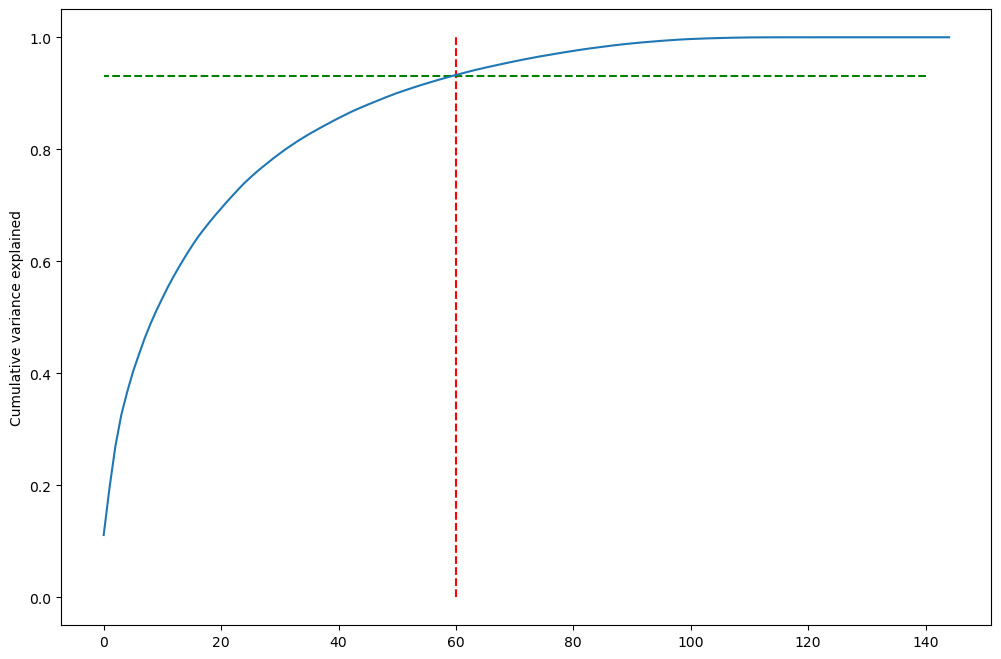

In [ ]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=0, xmin=140, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

We are selecting 60 components as it explains 93% of the variance

In [ ]:
pca_final = PCA(n_components=60)

In [ ]:
X_train_pca = pca_final.fit_transform(X_train_scaled)

In [ ]:
X_train_pca.shape

(21000, 60)

In [ ]:
X_test_pca = pca_final.transform(X_test_scaled)

#### Applying logistic regression on the data on our Principal components

In [ ]:
logreg = LogisticRegression()

In [ ]:
model_pca = logreg.fit(X_train_pca, y_train)

In [ ]:
pred_train = model_pca.predict(X_train_pca)
"{:2.2}".format(metrics.recall_score(y_train, pred_train))

'0.31'

In [ ]:
pred_test = model_pca.predict(X_test_pca)
"{:2.2}".format(metrics.recall_score(y_test, pred_test))

'0.31'

### 4.3.2 Respampling techniques
We will use various resampling techniques to try to deal with class imbalance

In [ ]:
!pip install -U imbalanced-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
def train_logistic_model(X_train, y_train):
    model_rus_pca = logreg.fit(X_train_resampled, y_train_resampled)
    pred_train = model_rus_pca.predict(X_train_resampled)
    print("Train recall {:2.2}".format(metrics.recall_score(y_train_resampled, pred_train)))
    pred_test = model_rus_pca.predict(X_test_pca)
    print("Test recall {:2.2}".format(metrics.recall_score(y_test, pred_test)))
    print("Test precision {:2.2}".format(metrics.precision_score(y_test, pred_test)))

**Random Under-sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# Create a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=42)

# Fit and transform the data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_pca, y_train)

In [ ]:
train_logistic_model(X_train_resampled, y_train_resampled)

Train recall 0.84
Test recall 0.83
Test precision 0.32


**Tomek Links:**

In [ ]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_train_resampled, y_train_resampled = tl.fit_resample(X_train_pca, y_train)
train_logistic_model(X_train_resampled, y_train_resampled)

Train recall 0.34
Test recall 0.34
Test precision 0.61


**SMOTE:**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)
train_logistic_model(X_train_resampled, y_train_resampled)

Train recall 0.85
Test recall 0.84
Test precision 0.34


**ADASYN:**

In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_pca, y_train)
train_logistic_model(X_train_resampled, y_train_resampled)

Train recall 0.82
Test recall 0.86
Test precision 0.31


**SMOTE ENN:**

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_pca, y_train)
train_logistic_model(X_train_resampled, y_train_resampled)

Train recall 0.9
Test recall 0.88
Test precision 0.27


**SMOTE TOMEK:**

In [ ]:
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
train_logistic_model(X_train_resampled, y_train_resampled)

Train recall 0.9
Test recall 0.88
Test precision 0.27


**Balanced Random Forest Classifier:**

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train_pca, y_train)

BalancedRandomForestClassifier(random_state=42)

In [ ]:
pred_train = brf.predict(X_train_pca)
print("Train recall {:2.2}".format(metrics.recall_score(y_train, pred_train)))
pred_test = brf.predict(X_test_pca)
print("Test recall {:2.2}".format(metrics.recall_score(y_test, pred_test)))

Train recall 1.0
Test recall 0.81


**Easy Ensemble Classifier:**

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
ee = EasyEnsembleClassifier(random_state=42)
ee.fit(X_train_pca, y_train)

pred_train = ee.predict(X_train_pca)
print("Train recall {:2.2}".format(metrics.recall_score(y_train, pred_train)))
pred_test = brf.predict(X_test_pca)
print("Test recall {:2.2}".format(metrics.recall_score(y_test, pred_test)))

Train recall 0.83
Test recall 0.81


Let's use **SMOTE ENN** as it is giveing the highest and similar Test and Train recall score

## Step 5:Model Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_pca, y_train)

In [ ]:
%%time
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

CPU times: user 18.2 s, sys: 0 ns, total: 18.2 s
Wall time: 18.1 s


RandomForestClassifier()

In [ ]:
pred_train = rf.predict(X_train_resampled)
print("Train recall {:2.2}".format(metrics.recall_score(y_train_resampled, pred_train)))
pred_test = rf.predict(X_test_pca)
print("Test recall {:2.2}".format(metrics.recall_score(y_test, pred_test)))

Train recall 1.0
Test recall 0.77


In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Grandient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=200,
                                 max_features=4, 
                                 min_samples_leaf=35,  
                                 random_state=42,
                                 learning_rate=0.05
                                )

In [ ]:
%%time
gbc.fit(X_train_resampled, y_train_resampled)

CPU times: user 7.34 s, sys: 0 ns, total: 7.34 s
Wall time: 7.34 s


GradientBoostingClassifier(learning_rate=0.05, max_features=4,
                           min_samples_leaf=35, n_estimators=200,
                           random_state=42)

In [ ]:
pred_train = gbc.predict(X_train_resampled)
print("Train recall {:2.2}".format(metrics.recall_score(y_train_resampled, pred_train)))
pred_test = rf.predict(X_test_pca)
print("Test recall {:2.2}".format(metrics.recall_score(y_test, pred_test)))

Train recall 0.91
Test recall 0.77


In [ ]:
!pip install lightgbm


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import lightgbm as lgb

In [ ]:
clf = lgb.LGBMClassifier(boosting_type='gbdt', metric='auc', objective='binary', random_state=42, n_jobs=1, 
                         verbose=-1)

In [ ]:
%%time
clf.fit(X_train_resampled, y_train_resampled)

CPU times: user 921 ms, sys: 0 ns, total: 921 ms
Wall time: 921 ms


LGBMClassifier(metric='auc', n_jobs=1, objective='binary', random_state=42,
               verbose=-1)

In [ ]:
pred_train = clf.predict(X_train_resampled)
print("Train recall {:2.2}".format(metrics.recall_score(y_train_resampled, pred_train)))
pred_test = clf.predict(X_test_pca)
print("Test recall {:2.2}".format(metrics.recall_score(y_test, pred_test)))

Train recall 0.99
Test recall 0.84


### 5.2 Hyper-parameter Tuning

In [ ]:
!pip install scikit-optimize


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Categorical, Integer

from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, auc
from sklearn.metrics import make_scorer

from sklearn.model_selection import StratifiedKFold

In [ ]:
# Reporting util for different optimizers
def report_perf(optimizer, X, y, title="model", callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = time()
    
    try:
        if callbacks is not None:
            optimizer.fit(X, y, callback=callbacks)
        else:
            optimizer.fit(X, y)
    except TypeError as e:
        print("Error during optimization:", e)
        raise
        
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           + u"\u00B1"+" %.3f") % (time() - start, 
                                   len(optimizer.cv_results_['params']),
                                   best_score,
                                   best_score_std))    
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

In [ ]:
# Converting average precision score into a scorer suitable for model selection
roc_auc = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)

In [ ]:
# Setting a 5-fold stratified cross-validation (note: shuffle=True)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
search_spaces = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),     # Boosting learning rate
    'n_estimators': Integer(30, 5000),                   # Number of boosted trees to fit
    'num_leaves': Integer(2, 512),                       # Maximum tree leaves for base learners
    'max_depth': Integer(-1, 256),                       # Maximum tree depth for base learners, <=0 means no limit
    'min_child_samples': Integer(1, 256),                # Minimal number of data in one leaf
    'max_bin': Integer(100, 1000),                       # Max number of bins that feature values will be bucketed
    'subsample': Real(0.01, 1.0, 'uniform'),             # Subsample ratio of the training instance
    'subsample_freq': Integer(0, 10),                    # Frequency of subsample, <=0 means no enable
    'colsample_bytree': Real(0.01, 1.0, 'uniform'),      # Subsample ratio of columns when constructing each tree
    'min_child_weight': Real(0.01, 10.0, 'uniform'),     # Minimum sum of instance weight (hessian) needed in a child (leaf)
    'reg_lambda': Real(1e-9, 100.0, 'log-uniform'),      # L2 regularization
    'reg_alpha': Real(1e-9, 100.0, 'log-uniform'),       # L1 regularization
    'scale_pos_weight': Real(1.0, 500.0, 'uniform'),     # Weighting of the minority class (Only for binary classification)
}

In [ ]:
opt = BayesSearchCV(estimator=clf,                                    
                    search_spaces=search_spaces,                      
                    scoring=roc_auc,                                  
                    cv=5,                                           
                    n_iter=3000,                                      # max number of trials
                    n_points=3,                                       # number of hyperparameter sets evaluated at the same time
                    n_jobs=16,                                        # number of jobs
                    iid=False,                                        # if not iid it optimizes on the cv score
                    return_train_score=False,                         
                    refit=False,                                      
                    optimizer_kwargs={'base_estimator': 'GP'},        # optmizer parameters: we use Gaussian Process (GP)
                    random_state=42                                   # random state for replicability
        )                                                             

In [ ]:
overdone_control = DeltaYStopper(delta=0.0001)               # We stop if the gain of the optimization becomes too small
time_limit_control = DeadlineStopper(total_time=60 * 45)     # We impose a time limit (45 minutes)

np.int = int

best_params = report_perf(opt, X_train_resampled, y_train_resampled,'LightGBM', 
                          callbacks=[overdone_control, time_limit_control])

LightGBM took 2559.02 seconds,  candidates checked: 204, best CV score: 0.999 ± 0.000
Best parameters:
OrderedDict([('colsample_bytree', 0.8045542327136398),
             ('learning_rate', 0.1257079520813052),
             ('max_bin', 721),
             ('max_depth', 119),
             ('min_child_samples', 193),
             ('min_child_weight', 0.01),
             ('n_estimators', 2905),
             ('num_leaves', 459),
             ('reg_alpha', 2.599758197054949e-07),
             ('reg_lambda', 1e-09),
             ('scale_pos_weight', 488.5119812477322),
             ('subsample', 1.0),
             ('subsample_freq', 10)])



In [ ]:
best_params

OrderedDict([('colsample_bytree', 0.8045542327136398),
             ('learning_rate', 0.1257079520813052),
             ('max_bin', 721),
             ('max_depth', 119),
             ('min_child_samples', 193),
             ('min_child_weight', 0.01),
             ('n_estimators', 2905),
             ('num_leaves', 459),
             ('reg_alpha', 2.599758197054949e-07),
             ('reg_lambda', 1e-09),
             ('scale_pos_weight', 488.5119812477322),
             ('subsample', 1.0),
             ('subsample_freq', 10)])

### 5.3 Plotting ROC curve

In [ ]:
clf = lgb.LGBMClassifier(boosting_type='gbdt',
                         metric='auc',
                         objective='binary',
                         n_jobs=1, 
                         verbose=-1,
                         random_state=0,
                         **best_params)

In [ ]:
clf.fit(X_train_resampled, y_train_resampled)

LGBMClassifier(colsample_bytree=0.8045542327136398,
               learning_rate=0.1257079520813052, max_bin=721, max_depth=119,
               metric='auc', min_child_samples=193, min_child_weight=0.01,
               n_estimators=2905, n_jobs=1, num_leaves=459, objective='binary',
               random_state=0, reg_alpha=2.599758197054949e-07,
               reg_lambda=1e-09, scale_pos_weight=488.5119812477322,
               subsample_freq=10, verbose=-1)

In [ ]:
y_test_predicted = clf.predict_proba(X_test_pca)

In [ ]:
y_train_pred_final = pd.DataFrame([])

In [ ]:
y_train_pred_final["predicted"] = pd.Series(y_test_predicted[:, 1])

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(3, 3))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

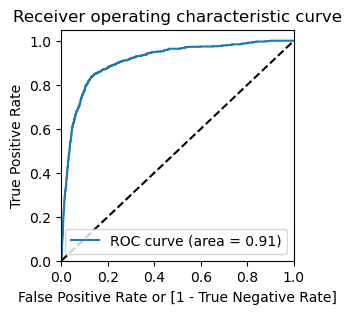

In [ ]:
draw_roc(y_test, y_train_pred_final["predicted"])

The ROC shows a coverage of 91% which is decent and can be used.

### 5.3 Finding Optimal Cutoff Point

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final["predicted"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,1.593694e-04,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.151478e-08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5.964716e-05,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.351223e-04,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.981442e-07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

# num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    cm1 = confusion_matrix(y_test, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.088444  1.000000  0.000000
0.05  0.05  0.827556  0.868090  0.823623
0.10  0.10  0.835000  0.859296  0.832643
0.15  0.15  0.841000  0.856784  0.839469
0.20  0.20  0.845889  0.854271  0.845076
0.25  0.25  0.849111  0.851759  0.848854
0.30  0.30  0.853000  0.850503  0.853242
0.35  0.35  0.855444  0.847990  0.856168
0.40  0.40  0.858778  0.845477  0.860068
0.45  0.45  0.859778  0.841709  0.861531
0.50  0.50  0.862111  0.841709  0.864091
0.55  0.55  0.863667  0.840452  0.865919
0.60  0.60  0.865444  0.839196  0.867991
0.65  0.65  0.867000  0.834171  0.870185
0.70  0.70  0.869444  0.829146  0.873354
0.75  0.75  0.871222  0.829146  0.875305
0.80  0.80  0.872444  0.826633  0.876889
0.85  0.85  0.875111  0.821608  0.880302
0.90  0.90  0.878000  0.815327  0.884081
0.95  0.95  0.881889  0.804020  0.889444


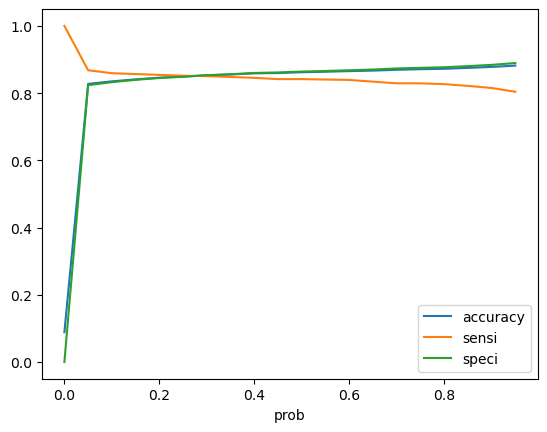

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

We can take 0.2 as a cutoff as it gives the best sensitivity, specificity and accuracy

#### Hyper parameter tuning logistic regression

In [ ]:
logreg = [
    LogisticRegression(solver='newton-cg',penalty='none',max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='none',max_iter=1000),
    LogisticRegression(solver='sag',penalty='none',max_iter=1000),
    LogisticRegression(solver='saga',penalty='none',max_iter=1000)
]

In [ ]:
logreg_columns = []
logreg_compare = pd.DataFrame(columns = logreg_columns)

In [ ]:
row_index = 0
for alg in logreg:
    predicted = alg.fit(X_train_resampled, y_train_resampled).predict(X_test_pca)
    fp, tp, th = roc_curve(y_test, predicted)
    logreg_name = alg.__class__.__name__
    logreg_compare.loc[row_index, 'Solver'] = alg.solver
    logreg_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_resampled, y_train_resampled), 5)
    logreg_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_pca, y_test), 5)
    logreg_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),5)
    logreg_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    logreg_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1

logreg_compare.sort_values(by = ['Recall'], ascending = False, inplace = True)    
logreg_compare

,Solver,Train Accuracy,Test Accuracy,Precission,Recall,AUC
2,sag,0.88782,0.77533,0.26727,0.88442,0.82459
3,saga,0.88821,0.77533,0.26727,0.88442,0.82459
0,newton-cg,0.88776,0.77644,0.26812,0.88317,0.82463
1,lbfgs,0.88773,0.77644,0.26812,0.88317,0.82463


#### With penalty term C

In [ ]:
logreg = [
    LogisticRegression(solver='newton-cg',penalty='l2', C=0.001, max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='l2', C=0.001,max_iter=1000),
    LogisticRegression(solver='sag',penalty='l2', C=0.001,max_iter=1000),
    LogisticRegression(solver='saga',penalty='l2', C=0.001,max_iter=1000)
]

logreg_columns = []
logreg_compare = pd.DataFrame(columns = logreg_columns)

row_index = 0
for alg in logreg:
    predicted = alg.fit(X_train_resampled, y_train_resampled).predict(X_test_pca)
    fp, tp, th = roc_curve(y_test, predicted)
    logreg_name = alg.__class__.__name__
    logreg_compare.loc[row_index, 'Solver'] = alg.solver
    logreg_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_resampled, y_train_resampled), 5)
    logreg_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_pca, y_test), 5)
    logreg_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),5)
    logreg_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    logreg_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1

logreg_compare.sort_values(by = ['Recall'], ascending = False, inplace = True)    
logreg_compare

,Solver,Train Accuracy,Test Accuracy,Precission,Recall,AUC
0,newton-cg,0.88208,0.76389,0.25757,0.88693,0.81944
1,lbfgs,0.88208,0.76389,0.25757,0.88693,0.81944
2,sag,0.88208,0.76378,0.25748,0.88693,0.81938
3,saga,0.88205,0.76367,0.25738,0.88693,0.81932


**Observation**
- Even though the `Logistic regression` model have the higher recall value of `0.88` compared to 0.85 in the case of LightGBM , we will still prefer the `LightGBM` model as it has a high AUC value of `0.91`, and a higher accuracy and precision.

[]

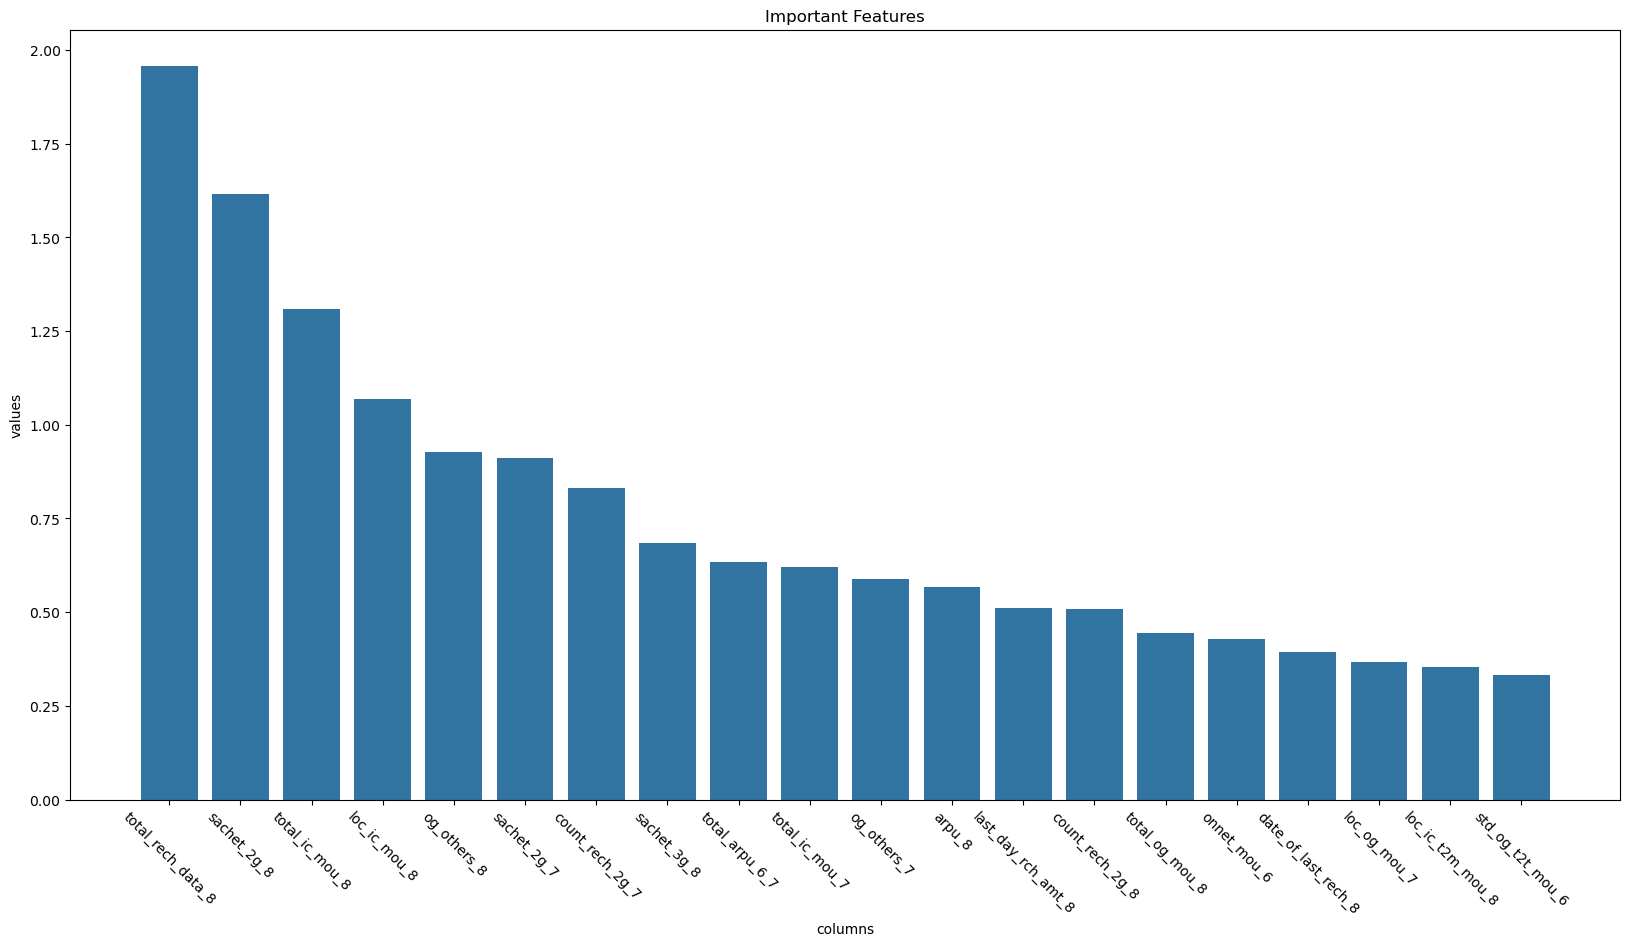

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(data = model_coef_df.sort_values(by="values", ascending=False), x="columns",  y="values")
plt.xticks(rotation=-45)
plt.title("Important Features")
plt.plot()

# Conclusion
### Recommendation strategies to manage customer churn


1) A substantial reduction in the Internet recharge amount and the maximum recharge amount in month 8 strongly suggests an impending churn.
<br/>

2) A decline in both incoming and outgoing special calls during month 8 indicates a heightened probability of churn.
<br/>

3) The diminished usage of 2G services in Month 8 signifies a growing trend of churn.
<br/>

4) An overall decline in all categories of outgoing calls serves as a potential indicator of churn, particularly among new customers who exhibit a higher tendency to churn.
<br/>

5) `LighGBM` model, boasting a testing `accuracy of 85%, sensitivity(recall) 83.91%, and specificity 85%`, demonstrated the most robust prediction scores.
<br/>

7) The combined recharge amount for July and August provides a strong indication of the likelihood of customer retention.
<br/>

8) Monitoring incoming STD calls and their durations can be instrumental in identifying potential instances of churn.